# Soccer Recommender System

We are building a soccer player recommender system, this system will assist football scouts when they want a player with a certain playing style. For example, PSG would want to fill the void Messi has left in the team. The best way to do that might be to have a players that is similar to Messi.

# Table of Contents

1. [Introduction](#introduction)
2. [Data Collection](#data-collection)
3. [Data Preprocessing](#data-preprocessing)
4. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis)
5. [Feature Engineering](#feature-engineering)
6. [Modeling](#modeling)
7. [Evaluation](#evaluation)
8. [Conclusion](#conclusion)

---

## 1. Introduction <a name="introduction"></a>
Your introduction goes here. Provide an overview of your data science project, the problem you are trying to solve, and the main objectives.

[Back to Top](#table-of-contents)

---

### 1.1 Importing libraries

In [110]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


## 2. Data Collection <a name="data-collection"></a>
In this section, explain where and how you gathered the data for your project. Discuss any challenges faced during data collection and how you addressed them.

[Back to Top](#table-of-contents)

---

The data used in this notebook was donwloaded from kaggle. It was not stated how the person gathered the data. We will assume that they used multiple sources to gather this data. We will post a link to the person's kaggle dataset.

In [111]:
df = pd.read_csv('https://raw.githubusercontent.com/Vambane/SoccerPlayerRecommender/main/FullData.csv')

In [112]:
df.head() #viewing the first five rows of the datasets

Name Nationality National_Position  National_Kit  \
0  Cristiano Ronaldo    Portugal                LS           7.0   
1       Lionel Messi   Argentina                RW          10.0   
2             Neymar      Brazil                LW          10.0   
3        Luis Suárez     Uruguay                LS           9.0   
4       Manuel Neuer     Germany                GK           1.0   

           Club Club_Position  Club_Kit Club_Joining  Contract_Expiry  Rating  \
0   Real Madrid            LW       7.0   07/01/2009           2021.0      94   
1  FC Barcelona            RW      10.0   07/01/2004           2018.0      93   
2  FC Barcelona            LW      11.0   07/01/2013           2021.0      92   
3  FC Barcelona            ST       9.0   07/11/2014           2021.0      92   
4     FC Bayern            GK       1.0   07/01/2011           2021.0      92   

   ... Long_Shots Curve Freekick_Accuracy Penalties  Volleys GK_Positioning  \
0  ...         90    81                76        85       88             14   
1  ...         88    89                90        74       85             14   
2  ...         77    79                84        81       83             15   
3  ...         86    86                84        85       88             33   
4  ...         16    14                11        47       11             91   

  GK_Diving  GK_Kicking  GK_Handling  GK_Reflexes  
0         7          15           11           11  
1         6          15           11            8  
2         9          15            9           11  
3        27          31           25           37  
4        89          95           90           89  

[5 rows x 53 columns]

## 3. Data Preprocessing <a name="data-preprocessing"></a>
Detail the steps you took to clean and preprocess the raw data. This may include handling missing values, data transformation, and normalization.

[Back to Top](#table-of-contents)

---



In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                17588 non-null  object 
 1   Nationality         17588 non-null  object 
 2   National_Position   1075 non-null   object 
 3   National_Kit        1075 non-null   float64
 4   Club                17588 non-null  object 
 5   Club_Position       17587 non-null  object 
 6   Club_Kit            17587 non-null  float64
 7   Club_Joining        17587 non-null  object 
 8   Contract_Expiry     17587 non-null  float64
 9   Rating              17588 non-null  int64  
 10  Height              17588 non-null  object 
 11  Weight              17588 non-null  object 
 12  Preffered_Foot      17588 non-null  object 
 13  Birth_Date          17588 non-null  object 
 14  Age                 17588 non-null  int64  
 15  Preffered_Position  17588 non-null  object 
 16  Work

The `national postion` and `kit` columns have the largest number of missing values. This could be players that have not been selected for the national team. We may need to remove these columns. 

In [114]:
print('There ' + str(len(df.columns)) + ' columns in this dataset')

There 53 columns in this dataset


In [115]:
print('These are the columns ', df.columns)

These are the columns  Index(['Name', 'Nationality', 'National_Position', 'National_Kit', 'Club',
       'Club_Position', 'Club_Kit', 'Club_Joining', 'Contract_Expiry',
       'Rating', 'Height', 'Weight', 'Preffered_Foot', 'Birth_Date', 'Age',
       'Preffered_Position', 'Work_Rate', 'Weak_foot', 'Skill_Moves',
       'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys',
       'GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling',
       'GK_Reflexes'],
      dtype='object')


In [116]:
df[df['National_Position'] == 'LM'].head()

Name Nationality National_Position  National_Kit  \
39        David Silva       Spain                LM          21.0   
45        David Alaba     Austria                LM           8.0   
76      Dimitri Payet      France                LM           8.0   
86   Yannick Carrasco     Belgium                LM          18.0   
123        João Mário    Portugal                LM          10.0   

                Club Club_Position  Club_Kit Club_Joining  Contract_Expiry  \
39   Manchester City           LCM      21.0   07/14/2010           2019.0   
45         FC Bayern            LB      27.0   02/10/2010           2021.0   
76   Olym. Marseille            LW      11.0   01/29/2017           2021.0   
86   Atlético Madrid            LM      10.0   07/10/2015           2022.0   
123            Inter           Sub       6.0   08/28/2016           2021.0   

     Rating  ... Long_Shots Curve Freekick_Accuracy Penalties  Volleys  \
39       87  ...         74    83                77        77       80   
45       86  ...         83    78                83        80       68   
76       85  ...         83    90                91        76       79   
86       84  ...         75    81                78        74       68   
123      83  ...         73    74                67        66       69   

    GK_Positioning GK_Diving  GK_Kicking  GK_Handling  GK_Reflexes  
39               1         1           1            1            1  
45              15         5          14            7            9  
76              14        11           9           15           12  
86              10         9           9           11           10  
123              8         6           8           15            8  

[5 rows x 53 columns]

**Due to the amount of missing values in the `National_Position` and `National_Kit`, we are going to block these two columns**

In [117]:
df = df.drop(['National_Position', 'National_Kit'], axis = 1)

Lets look at the df.info() again now that we have removed the national position and kit

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                17588 non-null  object 
 1   Nationality         17588 non-null  object 
 2   Club                17588 non-null  object 
 3   Club_Position       17587 non-null  object 
 4   Club_Kit            17587 non-null  float64
 5   Club_Joining        17587 non-null  object 
 6   Contract_Expiry     17587 non-null  float64
 7   Rating              17588 non-null  int64  
 8   Height              17588 non-null  object 
 9   Weight              17588 non-null  object 
 10  Preffered_Foot      17588 non-null  object 
 11  Birth_Date          17588 non-null  object 
 12  Age                 17588 non-null  int64  
 13  Preffered_Position  17588 non-null  object 
 14  Work_Rate           17588 non-null  object 
 15  Weak_foot           17588 non-null  int64  
 16  Skil

In [119]:
df.isna().sum()

Name                  0
Nationality           0
Club                  0
Club_Position         1
Club_Kit              1
Club_Joining          1
Contract_Expiry       1
Rating                0
Height                0
Weight                0
Preffered_Foot        0
Birth_Date            0
Age                   0
Preffered_Position    0
Work_Rate             0
Weak_foot             0
Skill_Moves           0
Ball_Control          0
Dribbling             0
Marking               0
Sliding_Tackle        0
Standing_Tackle       0
Aggression            0
Reactions             0
Attacking_Position    0
Interceptions         0
Vision                0
Composure             0
Crossing              0
Short_Pass            0
Long_Pass             0
Acceleration          0
Speed                 0
Stamina               0
Strength              0
Balance               0
Agility               0
Jumping               0
Heading               0
Shot_Power            0
Finishing             0
Long_Shots      

**Creating a BMI**  

Body Mass Index = (weight in kilograms / height in meters squared)

In [120]:
df[['Weight', 'Height']].head()

Weight  Height
0  80 kg  185 cm
1  72 kg  170 cm
2  68 kg  174 cm
3  85 kg  182 cm
4  92 kg  193 cm

We will need to remove the `SI units` for oth the Weight and Height

In [121]:
df['Weight'] = df['Weight'].str.replace('kg', '') # removing the kilogram
df['Height'] = df['Height'].str.replace('cm', '') # recoming the centimeters

# Now we have to convert the datatypes of these two columns
# First we will create a coversion dict
convert_dict = {'Height': float,
                'Weight': float
                }
df = df.astype(convert_dict)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                17588 non-null  object 
 1   Nationality         17588 non-null  object 
 2   Club                17588 non-null  object 
 3   Club_Position       17587 non-null  object 
 4   Club_Kit            17587 non-null  float64
 5   Club_Joining        17587 non-null  object 
 6   Contract_Expiry     17587 non-null  float64
 7   Rating              17588 non-null  int64  
 8   Height              17588 non-null  float64
 9   Weight              17588 non-null  float64
 10  Preffered_Foot      17588 non-null  object 
 11  Birth_Date          17588 non-null  object 
 12  Age                 17588 non-null  int64  
 13  Preffered_Position  17588 non-null  object 
 14  Work_Rate           17588 non-null  object 
 15  Weak_foot           17588 non-null  int64  
 16  Skil

In [122]:
# Converting the cenetimeters to meters
df['Height (m)'] = df['Height'] / 100

In [123]:
df['BMI'] = round(df['Weight'] / (df['Height (m)'] * df['Height (m)']), 2)
df['BMI']

0        23.37
1        24.91
2        22.46
3        25.66
4        24.70
         ...  
17583    24.49
17584    23.37
17585    20.38
17586    24.69
17587    22.50
Name: BMI, Length: 17588, dtype: float64

## 4. Exploratory Data Analysis (EDA) <a name="exploratory-data-analysis"></a>
Present the results of your EDA, visualizations, and insights gained from analyzing the dataset. Identify patterns, correlations, and any interesting findings.

[Back to Top](#table-of-contents)

---


### Nationality

In [124]:
df.groupby('Nationality').count().tail()

Name  Club  Club_Position  Club_Kit  Club_Joining  \
Nationality                                                      
Uzbekistan      3     3              3         3             3   
Venezuela      42    42             42        42            42   
Wales         122   122            122       122           122   
Zambia          4     4              4         4             4   
Zimbabwe       10    10             10        10            10   

             Contract_Expiry  Rating  Height  Weight  Preffered_Foot  ...  \
Nationality                                                           ...   
Uzbekistan                 3       3       3       3               3  ...   
Venezuela                 42      42      42      42              42  ...   
Wales                    122     122     122     122             122  ...   
Zambia                     4       4       4       4               4  ...   
Zimbabwe                  10      10      10      10              10  ...   

             Freekick_Accuracy  Penalties  Volleys  GK_Positioning  GK_Diving  \
Nationality                                                                     
Uzbekistan                   3          3        3               3          3   
Venezuela                   42         42       42              42         42   
Wales                      122        122      122             122        122   
Zambia                       4          4        4               4          4   
Zimbabwe                    10         10       10              10         10   

             GK_Kicking  GK_Handling  GK_Reflexes  Height (m)  BMI  
Nationality                                                         
Uzbekistan            3            3            3           3    3  
Venezuela            42           42           42          42   42  
Wales               122          122          122         122  122  
Zambia                4            4            4           4    4  
Zimbabwe             10           10           10          10   10  

[5 rows x 52 columns]

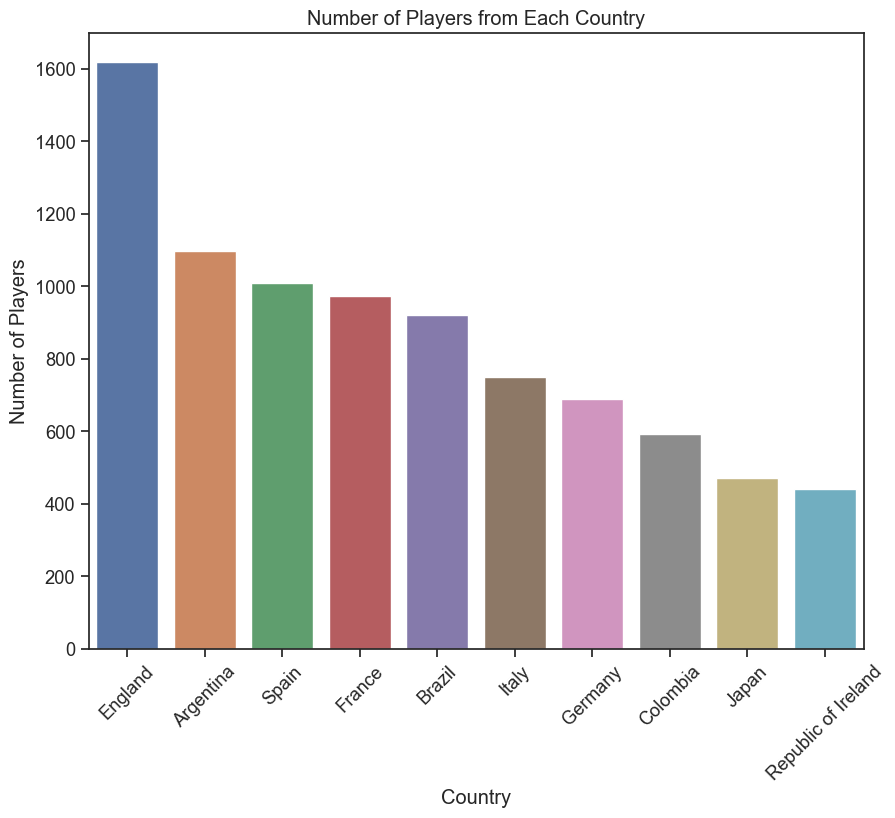

In [125]:
country_counts = df["Nationality"].value_counts().reset_index()
country_counts.columns = ['Country', 'Number of Players']

# Selecting the top 10 countries
top_10_countries = country_counts.head(10)
# figure size
plt.figure(figsize=(10, 8))

sns.barplot(x = 'Country', y = "Number of Players", data = top_10_countries)
plt.title('Number of Players from Each Country')
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.show()

Most of the players in this dataset are from England, 6 of the 10 countries are European. South America also produces a lot of footballers, Argentina and Brazil in particular. 

### Team  
Which teams have the most amount of players, since the EPL is the biggest league. Are english teams going to have the most amount of players?

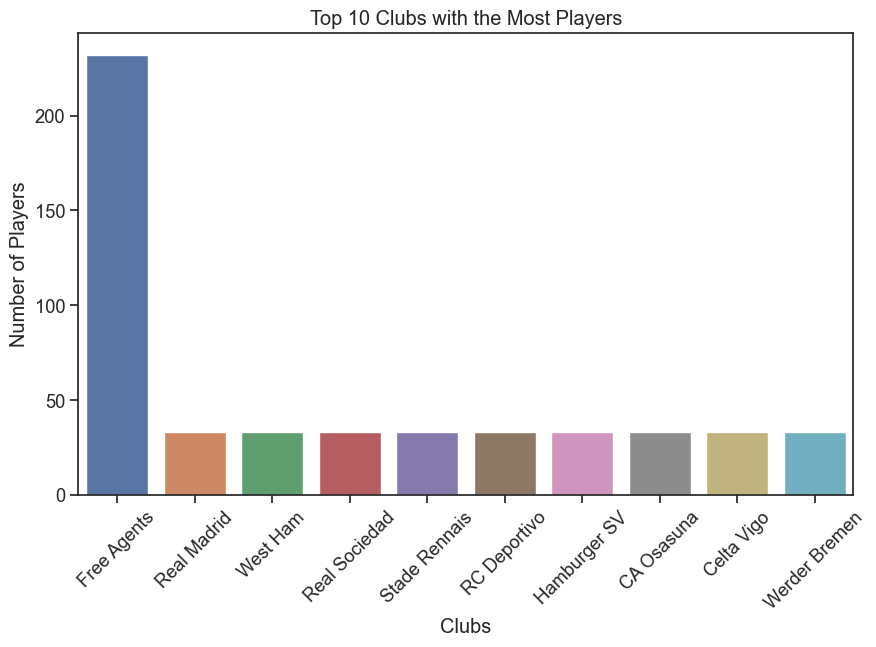

In [126]:
club_counts = df['Club'].value_counts().reset_index()
club_counts.columns = ['Club', 'Number of Players']

# Top 10 clubs based on the squad size
top_10_clubs = club_counts.head(10)

# figure size
plt.figure(figsize=(10,6))

sns.barplot(x='Club', y='Number of Players', data=top_10_clubs)
plt.title('Top 10 Clubs with the Most Players')
plt.xlabel('Clubs')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.show()

The squad sizes are similar across the different leagues. This is visible from the visual above. 

### Club Position

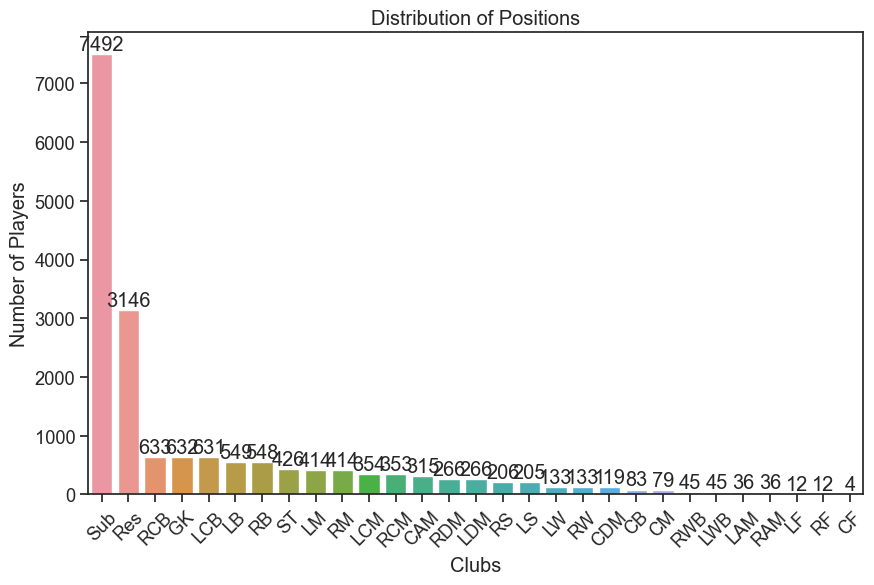

In [127]:
club_counts = df['Club_Position'].value_counts().reset_index()
club_counts.columns = ['Position', 'Number of Players']

# Top 10 clubs based on the squad size
#top_10_clubs = club_counts.head(10)

# figure size
plt.figure(figsize=(10,6))

sns.barplot(x='Position', y='Number of Players', data=club_counts)
plt.title('Distribution of Positions')
plt.xlabel('Clubs')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)

for index, value in enumerate(club_counts['Number of Players']):
    plt.text(index, value, str(value), ha='center', va='bottom')
    
plt.show()

As we move from the back to the front of the field, the number of players in the upfront position decreases. We have more RB than RW. The same is true for a LB and LW relationship.

### Scatterplot: Height v Weight

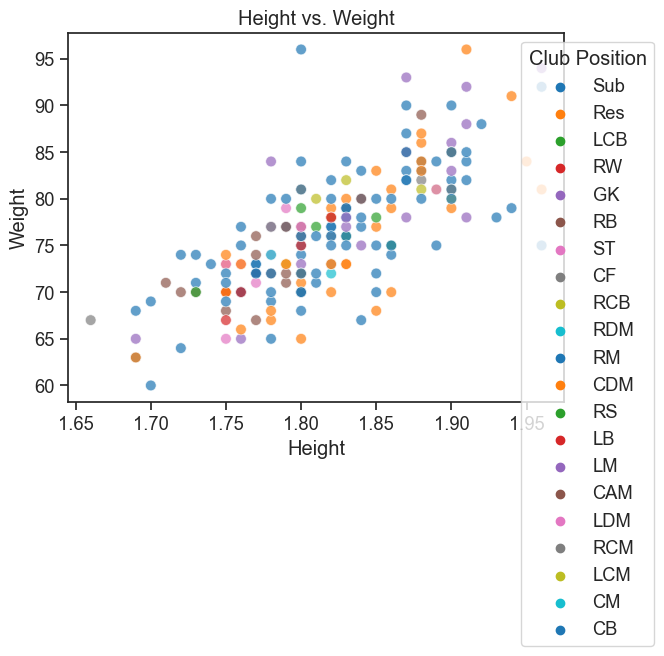

In [128]:
sns.scatterplot(x='Height (m)', y='Weight', data=df.sample(200), hue='Club_Position',
                palette='tab10', s=60, edgecolor='w', alpha=0.7)

# Add a legend for the hue
plt.legend(title='Club Position', loc='upper right', bbox_to_anchor=(1.2, 1))

plt.title('Height vs. Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [129]:
df['Club_Position'].unique()

array(['LW', 'RW', 'ST', 'GK', 'Sub', 'RCM', 'CAM', 'LCB', 'LCM', 'RS',
       'RB', 'RCB', 'LM', 'LDM', 'RM', 'LB', 'CDM', 'RDM', 'LF', 'CB',
       'LAM', 'Res', 'CM', 'LS', 'RF', 'RWB', 'RAM', 'LWB', nan, 'CF'],
      dtype=object)

In [130]:
def categorize_position(position):
    '''
    This function will shrink the unique football positions into the
    three basic positions with the two additional substitute and reserves
    position.
    
    This will make it easier to quantify the ratio of each position relative
    to the to other
    '''
    if position in ['GK']:
        return 'Goal Keeper'
    elif position in ['RB', 'RCB', 'LB', 'LCB', 'CB', 'RWB', 'LWB']:
        return 'Defender'
    elif position in ['LW', 'RW', 'RCM', 'CAM', 'LCM', 'LM', 'RM', 'CDM', 'RDM', 'LDM', 'CAM', 'CM', 'RAM']:
        return 'Midfielder'
    elif position in ['RS', 'LF', 'LS', 'RF', 'CF']:
        return 'Striker'
    elif position in ['Sub']:
        return 'Substitute'
    else:
        return 'Reserve'

df['Positions'] = df['Club_Position'].apply(categorize_position)
df['Positions'] = df['Positions'].fillna('Reserve')

In [131]:
df.groupby('Positions')['Name'].nunique()

Positions
Defender       2524
Goal Keeper     631
Midfielder     2871
Reserve        3597
Striker         439
Substitute     7441
Name: Name, dtype: int64

<Axes: xlabel='Positions', ylabel='count'>

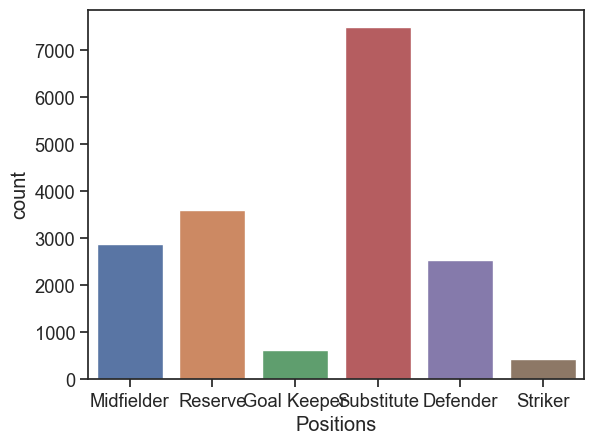

In [132]:
sns.countplot(data=df, x="Positions")

The starting 11 main have three categorises of players in the field.
1. `Defender`
2. `Midfielder`
3. `Striker`
4. `Goal Keeper`

Looking at the starting 11, There's a higher proportion of midfield and defensive players than both Strikers and Goal Keepers. Out of the 11 players the goal keeper and Striker less than 25%. This could be the reason why there are less striker and goal keepers than the other positions.  

The reserve and sub players, I have created a different categorises. These players do not feature in the starting 11.

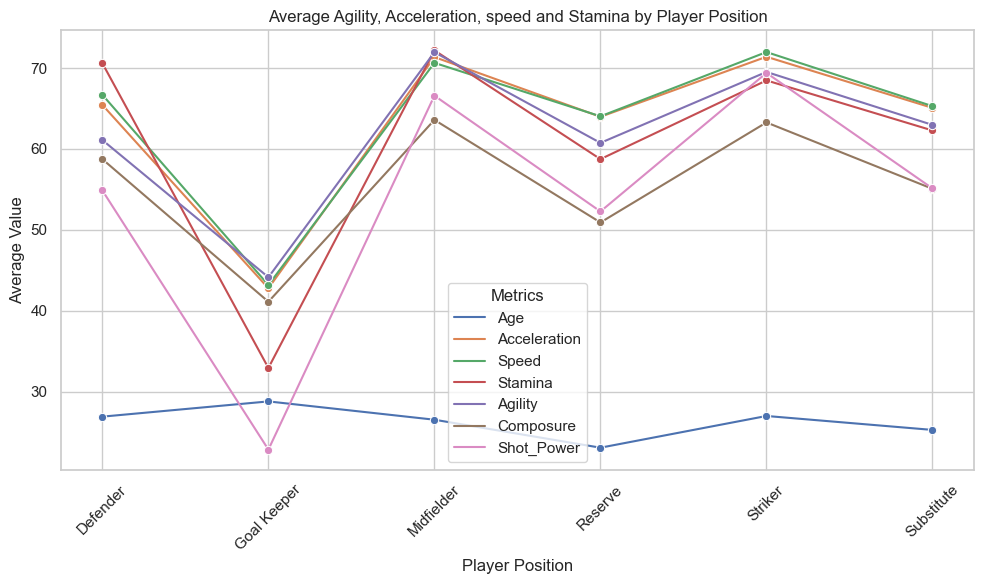

In [133]:
'''
Grouping the data by position and then plotting a multi-line line
chart to show they average data for each position
'''
numeric_df = df[['Positions', 'Age', 'Acceleration', 'Speed', 'Stamina', 'Agility', 'Composure', 'Shot_Power']]
#group by position and calculate the mean
avg_stats_by_position = numeric_df.groupby('Positions').mean().reset_index()

#melting the df from wide to long for ease of plotting
melted_df = pd.melt(avg_stats_by_position, id_vars=['Positions'], value_vars =['Age', 'Acceleration', 'Speed', 'Stamina', 'Agility', 'Composure', 'Shot_Power'])

#Line plot features
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.lineplot(data=melted_df, x='Positions', y='value', hue='variable', marker='o')


plt.title('Average Agility, Acceleration, speed and Stamina by Player Position')
plt.xlabel('Player Position')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(title='Metrics')

plt.tight_layout()
plt.show()

### Using a Radar chart to show the difference in the above characteristics

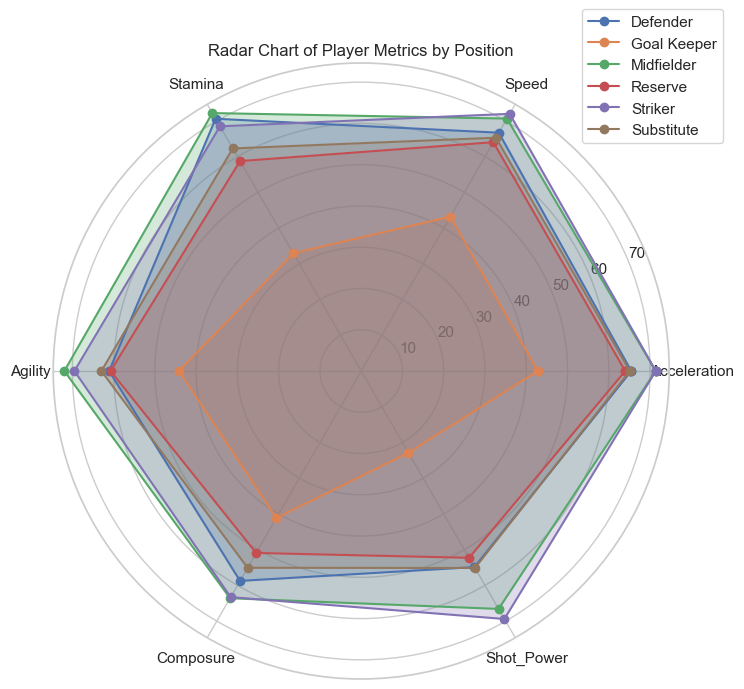

In [134]:
avg_stats_by_position = numeric_df.groupby('Positions').mean()

# List of the metric names
metrics = avg_stats_by_position.columns[1:]

#number of metrics
num_metrics = len(metrics)

#create a list values for each metric
values = avg_stats_by_position.iloc[:, 1:].values.tolist()

# Player Positions 
positions = avg_stats_by_position.index.tolist()

# Calculate angles for each axis
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False)

# Closing the radar plot
angles = np.concatenate((angles, [angles[0]]))

#Creatinng the plot
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)

#Plot each player position values
for i, (position, value) in enumerate(zip(positions, values)):
    ax.plot(angles, value + value[:1], marker='o', label=position)
    ax.fill(angles, value + value[:1], alpha=0.25)
    
#Set the labels for each axis
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.yaxis.grid(True)

# Set the title and legend
plt.title('Radar Chart of Player Metrics by Position')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()

## Creating subsets for the different positions

### 1. Goal Keeper

In [135]:
df['Club_Position'].unique()

array(['LW', 'RW', 'ST', 'GK', 'Sub', 'RCM', 'CAM', 'LCB', 'LCM', 'RS',
       'RB', 'RCB', 'LM', 'LDM', 'RM', 'LB', 'CDM', 'RDM', 'LF', 'CB',
       'LAM', 'Res', 'CM', 'LS', 'RF', 'RWB', 'RAM', 'LWB', nan, 'CF'],
      dtype=object)

In [136]:
no_of_GK = df[df['Club_Position'] == 'GK'].shape[0]
print('We have ', no_of_GK, ' in this Goal Keeper subset.')

We have  632  in this Goal Keeper subset.


In [137]:
GK_df = df[df['Club_Position'] == 'GK']
GK_df.sample(10).head()

Name Nationality         Club Club_Position  Club_Kit  \
6443        José Juan       Spain      CD Lugo            GK       1.0   
287          Casillas       Spain     FC Porto            GK       1.0   
3550   Manuel Riemann     Germany   VfL Bochum            GK       1.0   
1212      Fred Aníbão      Brazil       Grêmio            GK       1.0   
13041     Christy Pym     England  Exeter City            GK      30.0   

      Club_Joining  Contract_Expiry  Rating  Height  Weight  ... Penalties  \
6443    08/01/2012           2017.0      69   182.0    82.0  ...        15   
287     07/12/2015           2017.0      82   185.0    84.0  ...        24   
3550    07/01/2015           2020.0      72   186.0    83.0  ...        34   
1212    02/01/2015           2020.0      76   192.0    90.0  ...        24   
13041   08/01/2012           2017.0      62   182.0    70.0  ...        23   

      Volleys  GK_Positioning GK_Diving GK_Kicking  GK_Handling  GK_Reflexes  \
6443       14              64        78         68           65           67   
287        14              80        86         58           74           84   
3550       13              71        72         75           67           74   
1212       11              72        71         76           77           77   
13041      17              58        64         61           59           69   

       Height (m)    BMI    Positions  
6443         1.82  24.76  Goal Keeper  
287          1.85  24.54  Goal Keeper  
3550         1.86  23.99  Goal Keeper  
1212         1.92  24.41  Goal Keeper  
13041        1.82  21.13  Goal Keeper  

[5 rows x 54 columns]

In [138]:
GK_df.columns

Index(['Name', 'Nationality', 'Club', 'Club_Position', 'Club_Kit',
       'Club_Joining', 'Contract_Expiry', 'Rating', 'Height', 'Weight',
       'Preffered_Foot', 'Birth_Date', 'Age', 'Preffered_Position',
       'Work_Rate', 'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Dribbling',
       'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression',
       'Reactions', 'Attacking_Position', 'Interceptions', 'Vision',
       'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration',
       'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping',
       'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve',
       'Freekick_Accuracy', 'Penalties', 'Volleys', 'GK_Positioning',
       'GK_Diving', 'GK_Kicking', 'GK_Handling', 'GK_Reflexes', 'Height (m)',
       'BMI', 'Positions'],
      dtype='object')

Selecting only the goal keeper applicable columns for this subset. We will use the columns below:  
  
  
**'Name', 'Nationality', 'Club', 'Club_Position','Rating', 'Height', 'Weight',
       'Preffered_Foot', 'Age',
       'Work_Rate', 'Weak_foot', 'Ball_Control', 'Aggression',
       'Reactions', 'Vision',
       'Composure', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping',
       'Curve', 'Volleys', 'GK_Positioning',
       'GK_Diving', 'GK_Kicking', 'GK_Handling', 'GK_Reflexes', 'Height (m)',
       'BMI', 'Positions'**

In [139]:
GK_df = GK_df[['Name', 'Nationality', 'Rating', 'Height', 'Weight',
               'Preffered_Foot', 'Age', 'Work_Rate', 'Weak_foot',
               'Ball_Control', 'Aggression', 'Reactions', 'Vision',
               'Composure', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Stamina',
               'Strength', 'Balance', 'Agility', 'Jumping',
               'Curve', 'Volleys', 'GK_Positioning','GK_Diving',
               'GK_Kicking', 'GK_Handling', 'GK_Reflexes', 'Height (m)',
               'BMI', 'Positions']]

In [140]:
GK_df.describe()

Rating      Height      Weight         Age   Weak_foot  \
count  632.000000  632.000000  632.000000  632.000000  632.000000   
mean    69.825949  188.412975   83.006329   28.819620    2.568038   
std      6.651484    4.558688    6.004749    4.748081    0.667415   
min     52.000000  172.000000   64.000000   18.000000    1.000000   
25%     65.000000  185.000000   79.000000   25.000000    2.000000   
50%     69.000000  188.000000   83.000000   29.000000    3.000000   
75%     74.000000  191.000000   87.000000   32.000000    3.000000   
max     92.000000  202.000000  107.000000   44.000000    5.000000   

       Ball_Control  Aggression   Reactions      Vision   Composure  ...  \
count     632.00000  632.000000  632.000000  632.000000  632.000000  ...   
mean       20.97943   29.484177   65.126582   39.830696   41.129747  ...   
std         5.77589    9.239706    8.522356   13.525985   14.684930  ...   
min         5.00000    2.000000   33.000000   10.000000   12.000000  ...   
25%        17.00000   23.000000   59.000000   31.000000   29.000000  ...   
50%        21.00000   28.000000   66.000000   40.000000   40.000000  ...   
75%        23.00000   36.000000   71.000000   49.250000   53.000000  ...   
max        51.00000   75.000000   88.000000   72.000000   80.000000  ...   

          Jumping       Curve     Volleys  GK_Positioning   GK_Diving  \
count  632.000000  632.000000  632.000000      632.000000  632.000000   
mean    61.838608   15.212025   14.166139       68.731013   70.142405   
std     11.300501    4.948481    4.287149        7.314561    6.905427   
min     26.000000    6.000000    5.000000       48.000000   52.000000   
25%     55.000000   12.000000   12.000000       64.000000   65.000000   
50%     62.000000   14.000000   14.000000       68.000000   70.000000   
75%     70.000000   17.000000   16.000000       74.000000   75.000000   
max     85.000000   65.000000   35.000000       91.000000   89.000000   

       GK_Kicking  GK_Handling  GK_Reflexes  Height (m)         BMI  
count  632.000000   632.000000   632.000000  632.000000  632.000000  
mean    65.553797    67.583861    71.354430    1.884130   23.377294  
std      7.820507     7.534133     7.271572    0.045587    1.408815  
min     40.000000    45.000000    48.000000    1.720000   18.990000  
25%     61.000000    62.000000    67.000000    1.850000   22.550000  
50%     65.000000    68.000000    71.000000    1.880000   23.430000  
75%     70.000000    73.000000    76.000000    1.910000   24.310000  
max     95.000000    91.000000    90.000000    2.020000   29.330000  

[8 rows x 27 columns]

Goal Keepers Age distribution graph

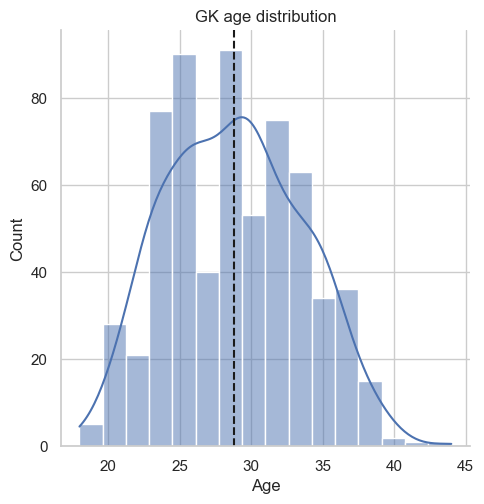

In [141]:
sns.displot(data=GK_df,
           x='Age',
           kde='kde')
ax = plt.gca()
ax.set_title('GK age distribution')
ax.axvline(GK_df['Age'].mean(), color='k',ls='--')
plt.show()

Looking at how age affects GK attributes

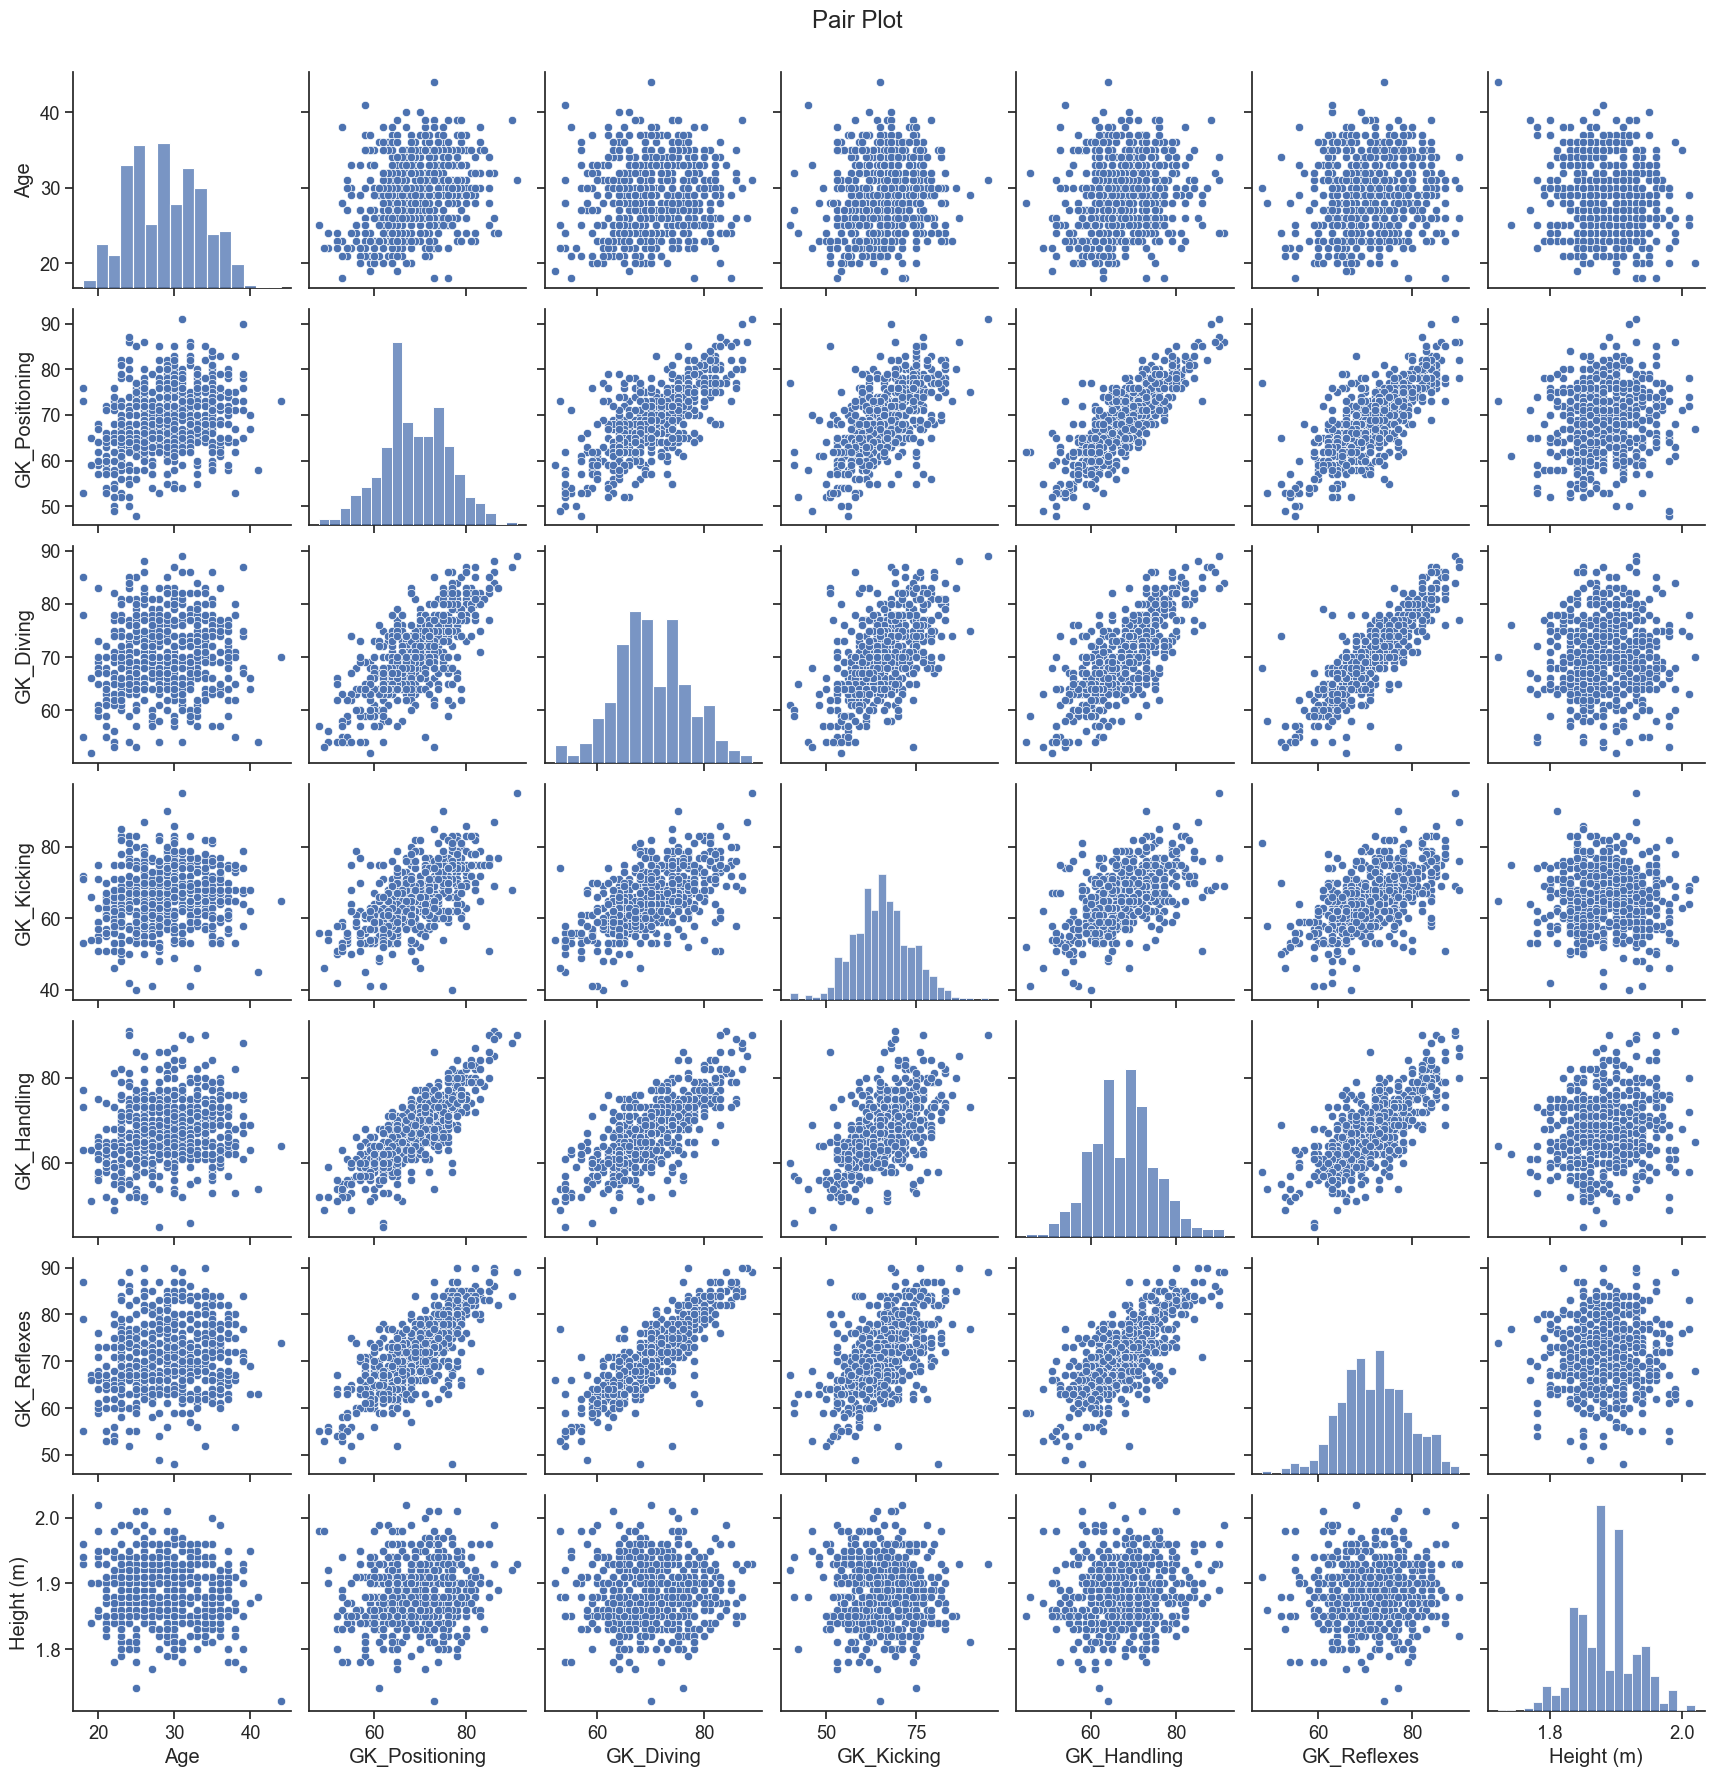

In [165]:
sns.set(style='ticks', font_scale=1.2)

# create a pairplot 
sns.pairplot(GK_df, vars=['Age','GK_Positioning','GK_Diving', 'GK_Kicking', 'GK_Handling', 'GK_Reflexes', 'Height (m)'])
plt.suptitle('Pair Plot', y=1.02)
plt.show()

**Goal Keeper with the highest rating**

In [143]:
#The highest rated GoalKeeper
GK_df.loc[GK_df['Rating'].idxmax()]

Name                 Manuel Neuer
Nationality               Germany
Rating                         92
Height                      193.0
Weight                       92.0
Preffered_Foot              Right
Age                            31
Work_Rate         Medium / Medium
Weak_foot                       4
Ball_Control                   48
Aggression                     29
Reactions                      85
Vision                         70
Composure                      70
Short_Pass                     55
Long_Pass                      59
Acceleration                   58
Stamina                        44
Strength                       83
Balance                        35
Agility                        52
Jumping                        78
Curve                          14
Volleys                        11
GK_Positioning                 91
GK_Diving                      89
GK_Kicking                     95
GK_Handling                    90
GK_Reflexes                    89
Height (m)    

**Goal Keeper with the lowest rating**

In [144]:
#The highest rated GoalKeeper
GK_df.loc[GK_df['Rating'].idxmin()]['Name']

'Matt Macey'

**We'll compare between the lowest and highly rated GK, the most important thing is how the attributes are distributed**

In [145]:
numeric_df = GK_df[['Rating','Age','GK_Positioning','GK_Diving',
                    'GK_Kicking', 'GK_Handling', 'GK_Reflexes',
                    'Ball_Control','Composure','Agility',
                   'Jumping','BMI','Short_Pass', 'Long_Pass']]

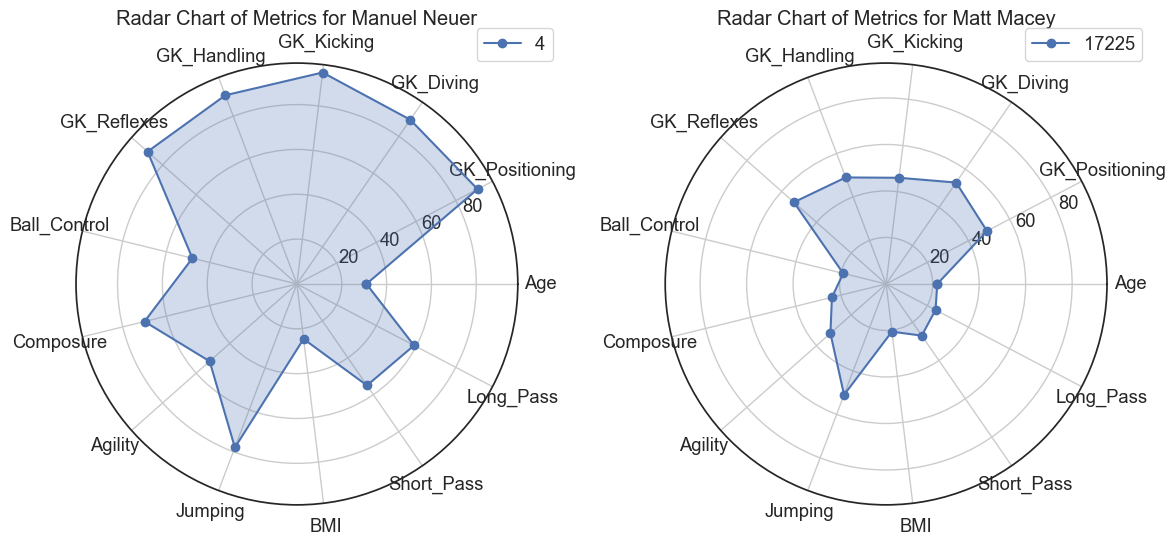

In [146]:
# Find the player with the highest rating
highest_rated_player_name = numeric_df['Rating'].idxmax() 
highest_rated_player_metrics = numeric_df.loc[highest_rated_player_name, :].drop('Rating')
player_name_highest = GK_df.loc[GK_df['Rating'].idxmax()]['Name']

# Find the player with the lowest rating
lowest_rated_player_name = numeric_df['Rating'].idxmin()
lowest_rated_player_metrics = numeric_df.loc[lowest_rated_player_name, :].drop('Rating')
player_name_lowest = GK_df.loc[GK_df['Rating'].idxmin()]['Name']

# Calculate the maximum value among metrics for both players
max_metric_value = max(highest_rated_player_metrics.max(), lowest_rated_player_metrics.max())

# Number of metrics
num_metrics = len(highest_rated_player_metrics)

# Calculate angles for each axis
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False)

# Closing the radar plot
angles = np.concatenate((angles, [angles[0]]))

# Creating the plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

# Plot the metrics for the highest rated player
plt.subplot(121, polar=True)
plt.plot(angles, highest_rated_player_metrics.tolist() + [highest_rated_player_metrics.iloc[0]], marker='o', label=highest_rated_player_name)
plt.fill(angles, highest_rated_player_metrics.tolist() + [highest_rated_player_metrics.iloc[0]], alpha=0.25)

# Set the labels for each axis
plt.xticks(angles[:-1], highest_rated_player_metrics.index)
plt.title(f'Radar Chart of Metrics for {player_name_highest}')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Plot the metrics for the lowest rated player
plt.subplot(122, polar=True)
plt.plot(angles, lowest_rated_player_metrics.tolist() + [lowest_rated_player_metrics.iloc[0]], marker='o', label=lowest_rated_player_name)
plt.fill(angles, lowest_rated_player_metrics.tolist() + [lowest_rated_player_metrics.iloc[0]], alpha=0.25)

# Set the labels for each axis
plt.xticks(angles[:-1], lowest_rated_player_metrics.index)
plt.title(f'Radar Chart of Metrics for {player_name_lowest}')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))


# Set the same y-axis limit for both subplots
plt.ylim(0, max_metric_value)

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

The above graphs show how the GK attributes are distributed between a highly and least rated GK.  
We are going to create an additional graph with a GK with a mean rating and see how it is different from these two.

In [147]:
# calculating the mean
mean_rating = numeric_df['Rating'].mean()
mean_age= numeric_df['Age'].mean()
print('The average Gk rating is ', round(mean_rating))
print('The average Gk age is ', round(mean_age))

The average Gk rating is  70
The average Gk age is  29


In [148]:
numeric_df[(numeric_df['Rating'] == 70) & (numeric_df['Age'] == 29)].head(1)

Rating  Age  GK_Positioning  GK_Diving  GK_Kicking  GK_Handling  \
4655      70   29              70         69          66           69   

      GK_Reflexes  Ball_Control  Composure  Agility  Jumping    BMI  \
4655           76            15         24       32       73  24.59   

      Short_Pass  Long_Pass  
4655          13         16

In [149]:
numeric_df.loc[4655]

Rating            70.00
Age               29.00
GK_Positioning    70.00
GK_Diving         69.00
GK_Kicking        66.00
GK_Handling       69.00
GK_Reflexes       76.00
Ball_Control      15.00
Composure         24.00
Agility           32.00
Jumping           73.00
BMI               24.59
Short_Pass        13.00
Long_Pass         16.00
Name: 4655, dtype: float64

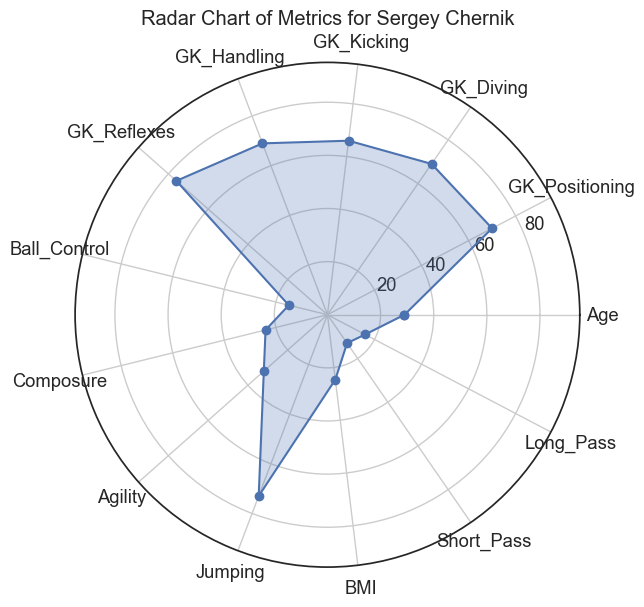

In [150]:
'''
We should multiple players with the average rating and age,
the best Gk to visualise their attributes would be a player with the average age and rating.
'''

# Find the player with the average rating
average_rated_player_name = 4655
average_rated_player_metrics = numeric_df.loc[average_rated_player_name, :].drop('Rating')
player_name_average = GK_df.loc[4655]['Name']

# Calculate the maximum value among metrics for both players
max_metric_value = max(highest_rated_player_metrics.max(),
                       lowest_rated_player_metrics.max())

# Number of metrics
num_metrics = len(highest_rated_player_metrics)

# Calculate angles for each axis
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False)

# Closing the radar plot
angles = np.concatenate((angles, [angles[0]]))

# Creating the plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

# Plot the metrics for the highest rated player
plt.subplot(121, polar=True)
plt.plot(angles, average_rated_player_metrics.tolist()
         + [average_rated_player_metrics.iloc[0]], marker='o',
         label=highest_rated_player_name)

plt.fill(angles, average_rated_player_metrics.tolist() +
         [average_rated_player_metrics.iloc[0]], alpha=0.25)

# Set the labels for each axis
plt.xticks(angles[:-1], average_rated_player_metrics.index)
plt.title(f'Radar Chart of Metrics for {player_name_average}')
#plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Set the same y-axis limit for both subplots
plt.ylim(0, max_metric_value)

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

We have analyzed there players:  
1. Manuel Neuer  
2. Matt Macey  
3. Sergey Chernik  
  
  These are the highest, average and lowest rated gk. These three graphs shows the distribution of attributes for these difference goal keepers. They will allow us to define what a good GK is.

### 2. Defenders

In [151]:
df.columns

Index(['Name', 'Nationality', 'Club', 'Club_Position', 'Club_Kit',
       'Club_Joining', 'Contract_Expiry', 'Rating', 'Height', 'Weight',
       'Preffered_Foot', 'Birth_Date', 'Age', 'Preffered_Position',
       'Work_Rate', 'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Dribbling',
       'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression',
       'Reactions', 'Attacking_Position', 'Interceptions', 'Vision',
       'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration',
       'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping',
       'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve',
       'Freekick_Accuracy', 'Penalties', 'Volleys', 'GK_Positioning',
       'GK_Diving', 'GK_Kicking', 'GK_Handling', 'GK_Reflexes', 'Height (m)',
       'BMI', 'Positions'],
      dtype='object')

In [187]:
def_df = df[df['Positions'] == 'Defender']
def_df = def_df[['Name', 'Club_Position',
                 'Rating', 'Height', 'Preffered_Foot', 'Age', 'Preffered_Position',
                 'Work_Rate', 'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Dribbling',
                 'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression',
                 'Reactions', 'Attacking_Position', 'Interceptions', 'Vision',
                 'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration',
                 'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping',
                 'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve',
                 'Freekick_Accuracy', 'Penalties', 'Volleys', 'Height (m)',
                 'BMI', 'Positions']]
def_df.head()

Name Club_Position  Rating  Height Preffered_Foot  Age  \
15       Thiago Silva           LCB      89   183.0          Right   32   
16       Sergio Ramos           LCB      89   183.0          Right   31   
24        Diego Godín           LCB      88   185.0          Right   31   
25       Mats Hummels           LCB      88   191.0          Right   28   
27  Giorgio Chiellini           LCB      88   187.0           Left   32   

   Preffered_Position      Work_Rate  Weak_foot  Skill_Moves  ...  Shot_Power  \
15                 CB    High / High          3            3  ...          78   
16                 CB  High / Medium          3            3  ...          79   
24                 CB  Medium / High          3            2  ...          67   
25                 CB  High / Medium          3            2  ...          71   
27                 CB     Low / High          2            2  ...          78   

    Finishing  Long_Shots  Curve  Freekick_Accuracy  Penalties  Volleys  \
15         38          71     61                 73         71       63   
16         60          55     73                 67         68       66   
24         42          43     49                 51         50       47   
25         55          51     65                 53         68       60   
27         33          49     60                 31         50       45   

    Height (m)    BMI  Positions  
15        1.83  23.59   Defender  
16        1.83  22.40   Defender  
24        1.85  21.33   Defender  
25        1.91  25.22   Defender  
27        1.87  24.02   Defender  

[5 rows x 42 columns]

In [153]:
def_df.describe()

Rating       Height          Age    Weak_foot  Skill_Moves  \
count  2534.000000  2534.000000  2534.000000  2534.000000  2534.000000   
mean     68.732044   182.623520    26.938043     2.842541     2.123520   
std       5.989564     6.110473     4.093811     0.610532     0.338559   
min      49.000000   161.000000    18.000000     1.000000     2.000000   
25%      65.000000   178.000000    24.000000     2.000000     2.000000   
50%      69.000000   183.000000    27.000000     3.000000     2.000000   
75%      72.000000   187.000000    30.000000     3.000000     2.000000   
max      89.000000   199.000000    39.000000     5.000000     4.000000   

       Ball_Control    Dribbling      Marking  Sliding_Tackle  \
count   2534.000000  2534.000000  2534.000000     2534.000000   
mean      59.636543    53.398185    66.851618       67.432912   
std        9.757831    13.485955     7.735976        7.460386   
min       25.000000    14.000000    23.000000       25.000000   
25%       54.000000    44.000000    62.000000       63.000000   
50%       61.000000    56.000000    67.000000       67.000000   
75%       66.000000    64.000000    72.000000       72.000000   
max       87.000000    84.000000    92.000000       95.000000   

       Standing_Tackle  ...      Heading   Shot_Power    Finishing  \
count      2534.000000  ...  2534.000000  2534.000000  2534.000000   
mean         68.893054  ...    63.192976    54.875691    36.498816   
std           7.173888  ...    10.107528    14.563173    12.396934   
min          22.000000  ...    25.000000    12.000000    10.000000   
25%          64.000000  ...    57.000000    44.000000    27.000000   
50%          69.000000  ...    64.000000    56.000000    35.000000   
75%          74.000000  ...    70.000000    66.000000    45.000000   
max          92.000000  ...    92.000000    89.000000    73.000000   

        Long_Shots        Curve  Freekick_Accuracy    Penalties      Volleys  \
count  2534.000000  2534.000000        2534.000000  2534.000000  2534.000000   
mean     42.773481    45.623520          41.534333    45.276243    37.470008   
std      15.472043    15.660997          14.874850    11.765115    12.713013   
min      11.000000    11.000000          10.000000    11.000000    11.000000   
25%      30.000000    33.000000          30.000000    37.000000    28.000000   
50%      42.000000    44.000000          39.000000    44.000000    35.000000   
75%      55.000000    58.000000          52.000000    53.000000    46.000000   
max      88.000000    86.000000          87.000000    90.000000    80.000000   

        Height (m)          BMI  
count  2534.000000  2534.000000  
mean      1.826235    23.080067  
std       0.061105     1.314511  
min       1.610000    17.180000  
25%       1.780000    22.222500  
50%       1.830000    23.080000  
75%       1.870000    23.890000  
max       1.990000    29.630000  

[8 rows x 36 columns]

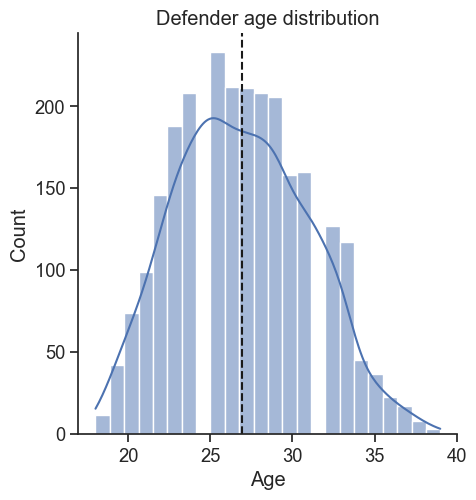

In [154]:
sns.displot(data=def_df,
           x='Age',
           kde='kde')
ax = plt.gca()
ax.set_title('Defender age distribution')
ax.axvline(def_df['Age'].mean(), color='k',ls='--')
plt.show()

In [155]:
def_df.columns

Index(['Name', 'Club_Position', 'Rating', 'Height', 'Preffered_Foot', 'Age',
       'Preffered_Position', 'Work_Rate', 'Weak_foot', 'Skill_Moves',
       'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys',
       'Height (m)', 'BMI'],
      dtype='object')

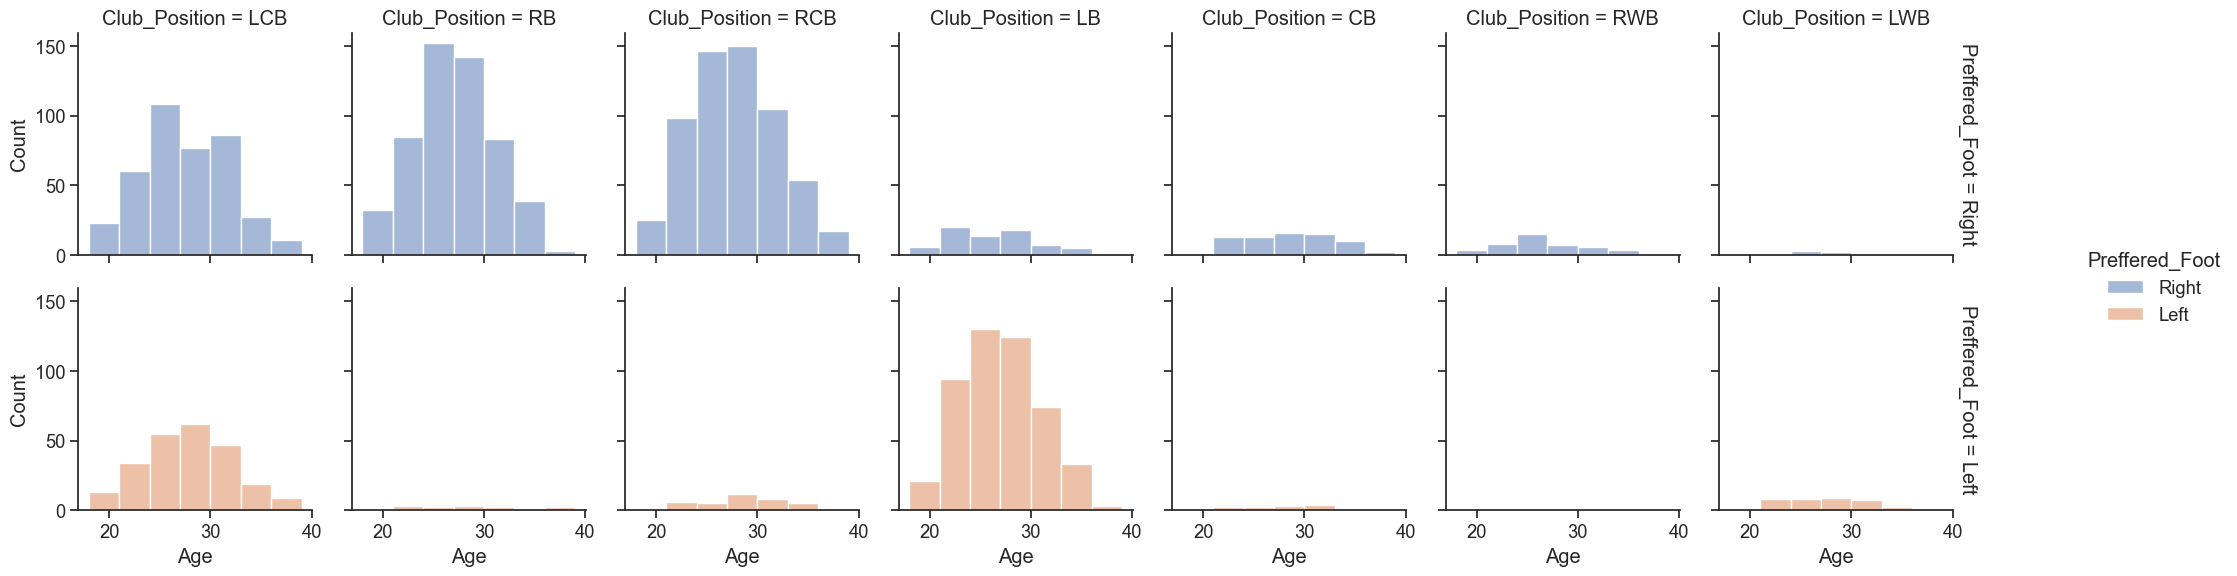

In [174]:
sns.set(style='ticks', font_scale=1.2)

# create a pairplot
sns.displot(
    def_df, x="Age", col="Club_Position", row="Preffered_Foot", hue='Preffered_Foot',
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

Due to the shortage of left footed defenders, we see can see that there are more right footed centre backs in the LCB position that left footed LCB.  
This is something a team can look out for when searching for a player. They will have less chances of getting a left-footed centre back in the market. 

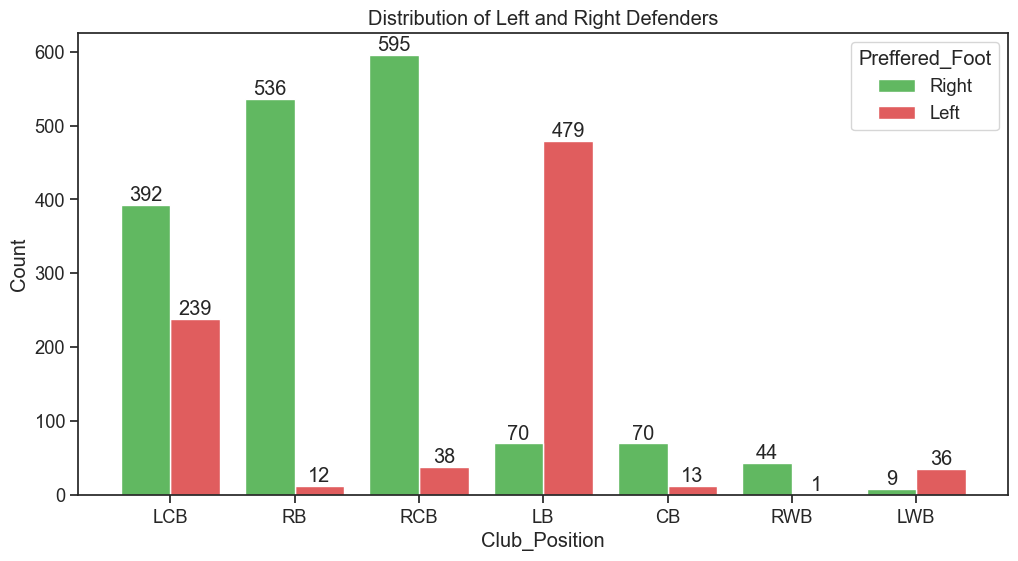

In [180]:
'''
Creating a similar graph as the one above but now directly comparing the left and right footed players.
'''
fig, ax1 = plt.subplots(figsize=(12,6))

# creating a pallete dict for the different colours
palette = {
    'Right': 'tab:green',
    'Left': 'tab:red',
}


ax = sns.histplot(data=def_df, x="Club_Position",
             hue="Preffered_Foot", multiple="dodge", palette=palette, shrink=.8)

# label the x-values
for container in ax.containers: 
    ax.bar_label(container)


ax = plt.gca()
ax.set_title('Distribution of Left and Right Defenders')
plt.show()

In [204]:
vital_def_attributes = def_df[['Rating', 'Age',
                                'Ball_Control', 'Marking', 'Sliding_Tackle',
                                'Standing_Tackle', 'Aggression', 'Reactions',
                                'Interceptions', 'Vision', 'Composure', 'Short_Pass',
                                'Long_Pass', 'Acceleration', 'Stamina', 'Strength',
                                'Agility', 'Jumping', 'Heading']]

In [200]:
vital_def_attributes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2534 entries, 15 to 17481
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rating           2534 non-null   int64  
 1   Height           2534 non-null   float64
 2   Age              2534 non-null   int64  
 3   Work_Rate        2534 non-null   object 
 4   Ball_Control     2534 non-null   int64  
 5   Marking          2534 non-null   int64  
 6   Sliding_Tackle   2534 non-null   int64  
 7   Standing_Tackle  2534 non-null   int64  
 8   Aggression       2534 non-null   int64  
 9   Reactions        2534 non-null   int64  
 10  Interceptions    2534 non-null   int64  
 11  Vision           2534 non-null   int64  
 12  Composure        2534 non-null   int64  
 13  Short_Pass       2534 non-null   int64  
 14  Long_Pass        2534 non-null   int64  
 15  Acceleration     2534 non-null   int64  
 16  Stamina          2534 non-null   int64  
 17  Strength         

In [193]:
def_df.loc[def_df['Rating'].idxmax()]['Name'] # Highly rated defender is Thiago Silva

'Thiago Silva'

In [195]:
def_df.loc[def_df['Rating'].idxmin()]['Name'] # Least rated defender is Simon Trier

'Simon Trier'

<Figure size 1200x600 with 0 Axes>

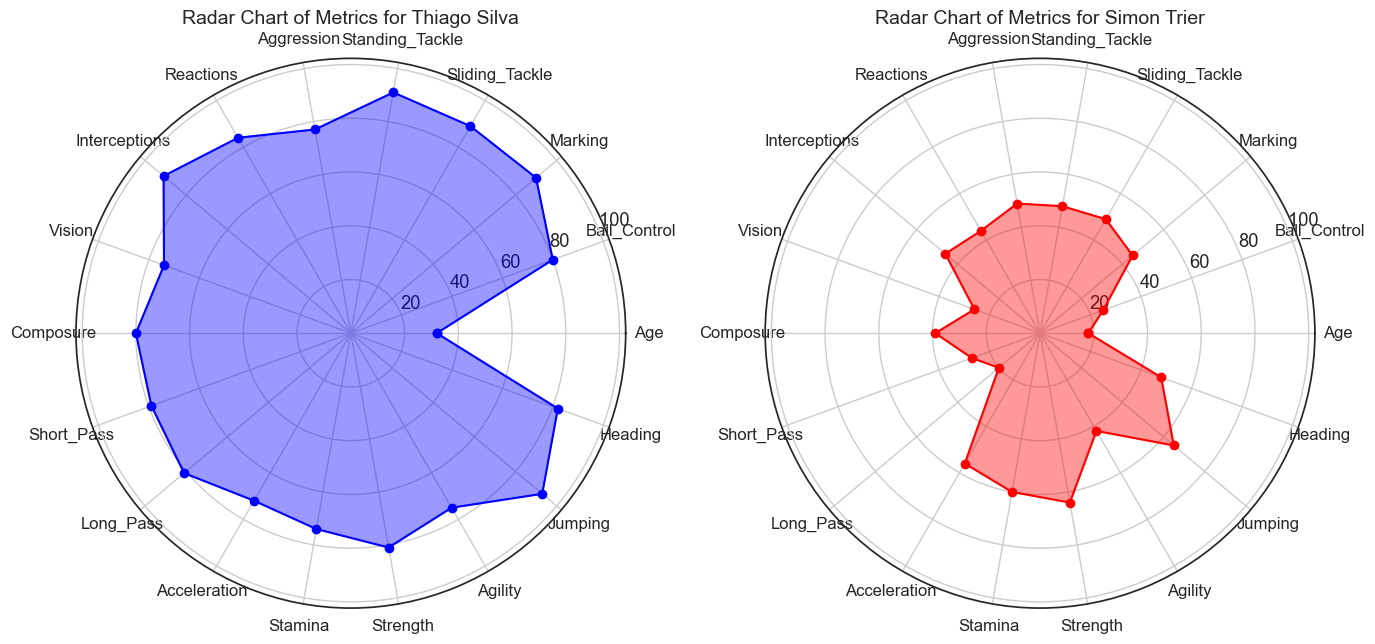

In [207]:
# Find the player with the highest rating
highest_rated_def_name = vital_def_attributes['Rating'].idxmax() 
highest_rated_def_metrics = vital_def_attributes.loc[highest_rated_def_name, :].drop('Rating')
player_name_highest = def_df.loc[def_df['Rating'].idxmax()]['Name']

# Find the player with the lowest rating
lowest_rated_def_name = vital_def_attributes['Rating'].idxmin()
lowest_rated_def_metrics = vital_def_attributes.loc[lowest_rated_def_name, :].drop('Rating')
player_name_lowest = def_df.loc[def_df['Rating'].idxmin()]['Name']

# Calculate the maximum value among metrics for both players
max_metric_value = max(highest_rated_def_metrics.max(), lowest_rated_def_metrics.max())

# Number of metrics
num_metrics = len(highest_rated_def_metrics)

# Calculate angles for each axis
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False)

# Closing the radar plot
angles = np.concatenate((angles, [angles[0]]))

# Creating the plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), subplot_kw=dict(polar=True))

# Set custom colors for the lines and fill areas
colors = ['blue', 'red', 'yellow']

# Plot the metrics for the highest rated player
ax1.plot(angles, highest_rated_def_metrics.tolist() + [highest_rated_def_metrics.iloc[0]], marker='o', label=highest_rated_def_name, color=colors[0])
ax1.fill(angles, highest_rated_def_metrics.tolist() + [highest_rated_def_metrics.iloc[0]], alpha=0.4, color=colors[0])

# Set the labels for each axis and adjust font size
ax1.set_xticks(angles[:-1])
ax1.set_xticklabels(highest_rated_def_metrics.index, fontsize=12)
ax1.set_title(f'Radar Chart of Metrics for {player_name_highest}', fontsize=14)
# ax1.legend(loc='upper left')

# Plot the metrics for the lowest rated player
ax2.plot(angles, lowest_rated_def_metrics.tolist() + [lowest_rated_def_metrics.iloc[0]], marker='o', label=lowest_rated_def_name, color=colors[1])
ax2.fill(angles, lowest_rated_def_metrics.tolist() + [lowest_rated_def_metrics.iloc[0]], alpha=0.4, color=colors[1])

# Set the labels for each axis and adjust font size
ax2.set_xticks(angles[:-1])
ax2.set_xticklabels(lowest_rated_def_metrics.index, fontsize=12)
ax2.set_title(f'Radar Chart of Metrics for {player_name_lowest}', fontsize=14)
# ax2.legend(loc='upper left')

# Set the same y-axis limit for both subplots (slightly above max_metric_value)
y_max = max_metric_value * 1.1
ax1.set_ylim(0, y_max)
ax2.set_ylim(0, y_max)

# Add grid lines
ax1.grid(True)
ax2.grid(True)

# Tight layout for proper spacing
plt.tight_layout()

# Show the plot
plt.show()

The above graphs show the different attributes between a highly rated defender `Thiago Silva` and Least rated defender `Simon Trier`. One thing to note, Simon is a very young player whilst Thiago Silva is a seasoned defender. The rader chart of Simon can still grow as he gains experience.  
  
  Just like we did with the goal keepers, we are now going to show how these attributes are distributed in a defender with average rating and age.

**Average Defender**

In [209]:
mean_rating = vital_def_attributes['Rating'].mean()
mean_age= vital_def_attributes['Age'].mean()
print('The average defender rating is ', round(mean_rating))
print('The average defender age is ', round(mean_age))

The average defender rating is  69
The average defender age is  27


In [213]:
#def_df[(def_df['Rating'] == 69) & (def_df['Age'] == 27)] #6029

<Figure size 1200x600 with 0 Axes>

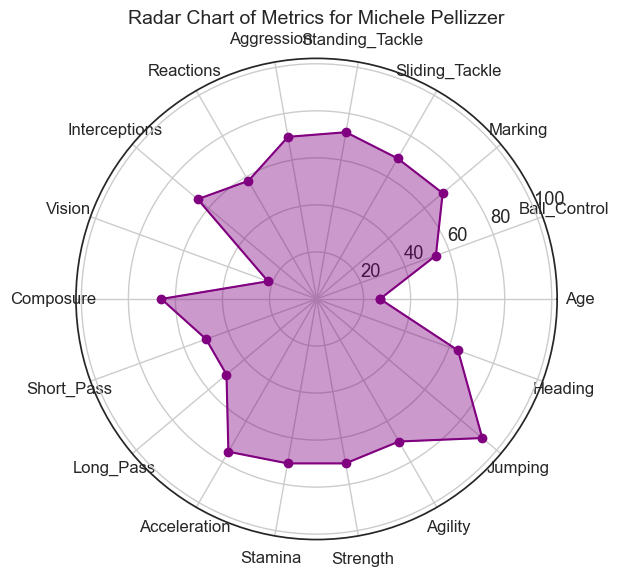

In [225]:
'''
We should multiple players with the average rating and age,
the best Gk to visualise their attributes would be a player with the average age and rating.
'''

# Find the player with the average rating
average_rated_def_name = 6029
average_rated_def_metrics = vital_def_attributes.loc[average_rated_def_name, :].drop('Rating')
player_name_average = def_df.loc[6029]['Name']

# Calculate the maximum value among metrics for both players
max_metric_value = max(highest_rated_def_metrics.max(),
                       lowest_rated_def_metrics.max())

# Number of metrics
num_metrics = len(highest_rated_def_metrics)

# Calculate angles for each axis
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False)

# Closing the radar plot
angles = np.concatenate((angles, [angles[0]]))

# Creating the plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(polar=True))

# Set custom colors for the radar lines and fill areas
colors = ['blue', 'green', 'yellow']

# Plot the metrics for the average-rated player
ax.plot(angles, average_rated_def_metrics.tolist() + [average_rated_def_metrics.iloc[0]], marker='o', label=player_name_average, color='purple')
ax.fill(angles, average_rated_def_metrics.tolist() + [average_rated_def_metrics.iloc[0]], alpha=0.4, color='purple')

# Set the labels for each axis and adjust font size
ax.set_xticks(angles[:-1])
ax.set_xticklabels(average_rated_def_metrics.index, fontsize=12)
ax.set_title(f'Radar Chart of Metrics for {player_name_average}', fontsize=14)
# ax.legend(loc='upper right')

# Set the y-axis limit (slightly above max_metric_value)
y_max = max_metric_value * 1.1
ax.set_ylim(0, y_max)

# Add grid lines
ax.grid(True)

# Tight layout for proper spacing
plt.tight_layout()

# Show the plot
plt.show()

<Figure size 1600x800 with 0 Axes>

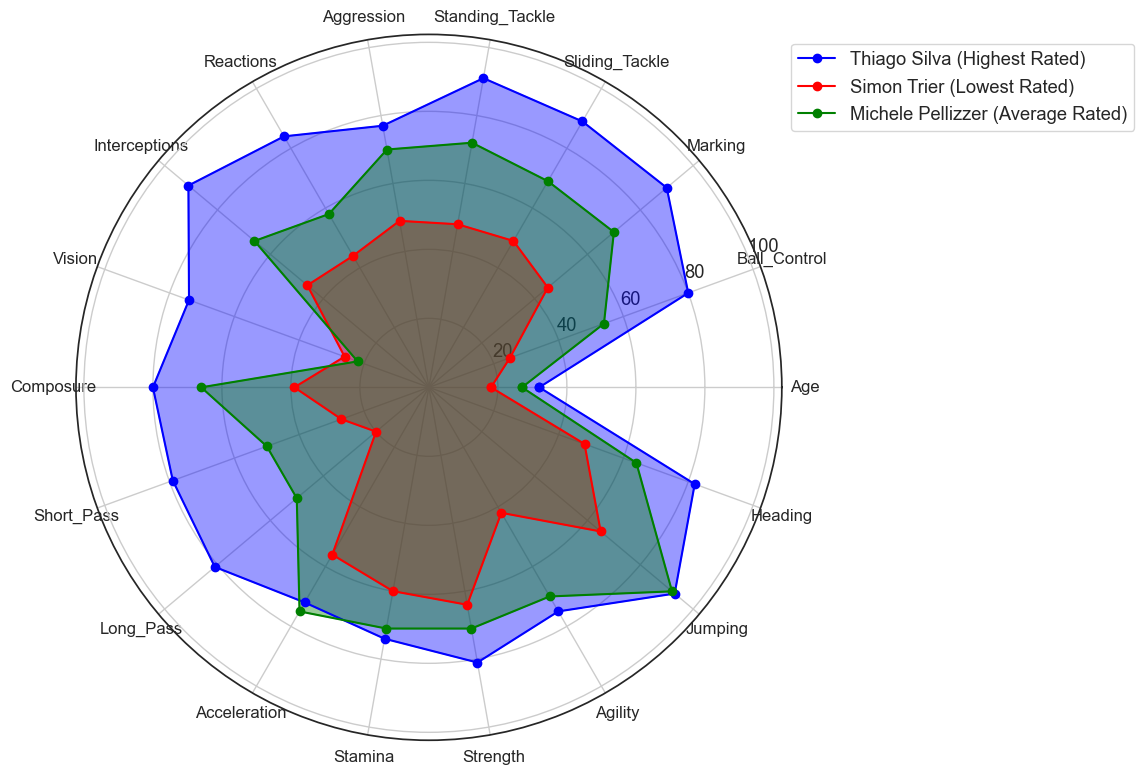

In [235]:
# Create the figure and subplot for the combined radar chart
plt.figure(figsize=(16, 8))  # Adjust figure size as needed
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(polar=True))

# Set custom colors for the radar lines and fill areas
colors = ['blue', 'red', 'yellow', 'green']

# Plot the metrics for the highest-rated player
ax.plot(angles, highest_rated_def_metrics.tolist() + [highest_rated_def_metrics.iloc[0]], marker='o', label=f'{player_name_highest} (Highest Rated)', color=colors[0])
ax.fill(angles, highest_rated_def_metrics.tolist() + [highest_rated_def_metrics.iloc[0]], alpha=0.4, color=colors[0])

# Plot the metrics for the lowest-rated player
ax.plot(angles, lowest_rated_def_metrics.tolist() + [lowest_rated_def_metrics.iloc[0]], marker='o', label=f'{player_name_lowest} (Lowest Rated)', color=colors[1])
ax.fill(angles, lowest_rated_def_metrics.tolist() + [lowest_rated_def_metrics.iloc[0]], alpha=0.4, color=colors[1])

# Plot the metrics for the average-rated player
ax.plot(angles, average_rated_def_metrics.tolist() + [average_rated_def_metrics.iloc[0]], marker='o', label=f'{player_name_average} (Average Rated)', color=colors[3])
ax.fill(angles, average_rated_def_metrics.tolist() + [average_rated_def_metrics.iloc[0]], alpha=0.4, color=colors[3])

# Set the labels for each axis and adjust font size
ax.set_xticks(angles[:-1])
ax.set_xticklabels(highest_rated_def_metrics.index, fontsize=12)
#ax.set_title(f'Radar Chart of Metrics for {player_name_highest}, {player_name_lowest}, and {player_name_average}', fontsize=14)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust the legend location as needed

# Set the y-axis limit (slightly above max_metric_value)
y_max = max_metric_value * 1.1
ax.set_ylim(0, y_max)

# Add grid lines
ax.grid(True)

# Tight layout for proper spacing
plt.tight_layout()

# Show the plot
plt.show()

Now we can see how all the different players compare against each other. A highly rated player casts a wider web, whilst the least rated player has a smallest web. Another notable attributes with Simon, he is the youngest of the three player. Michelle is the average player.

### 3. Midfielders

In [237]:
df['Positions'].head()

0     Midfielder
1     Midfielder
2     Midfielder
3        Reserve
4    Goal Keeper
Name: Positions, dtype: object

In [239]:
mid_df = df[df['Positions'] == 'Midfielder']
mid_df.head()

Name Nationality          Club Club_Position  Club_Kit  \
0   Cristiano Ronaldo    Portugal   Real Madrid            LW       7.0   
1        Lionel Messi   Argentina  FC Barcelona            RW      10.0   
2              Neymar      Brazil  FC Barcelona            LW      11.0   
7         Gareth Bale       Wales   Real Madrid            RW      11.0   
11        Eden Hazard     Belgium       Chelsea            LW      10.0   

   Club_Joining  Contract_Expiry  Rating  Height  Weight  ... Penalties  \
0    07/01/2009           2021.0      94   185.0    80.0  ...        85   
1    07/01/2004           2018.0      93   170.0    72.0  ...        74   
2    07/01/2013           2021.0      92   174.0    68.0  ...        81   
7    09/02/2013           2022.0      90   183.0    74.0  ...        76   
11   07/01/2012           2020.0      89   173.0    74.0  ...        86   

   Volleys  GK_Positioning GK_Diving GK_Kicking  GK_Handling  GK_Reflexes  \
0       88              14         7         15           11           11   
1       85              14         6         15           11            8   
2       83              15         9         15            9           11   
7       76               5        15         11           15            6   
11      79               8        11          6           12            8   

    Height (m)    BMI   Positions  
0         1.85  23.37  Midfielder  
1         1.70  24.91  Midfielder  
2         1.74  22.46  Midfielder  
7         1.83  22.10  Midfielder  
11        1.73  24.73  Midfielder  

[5 rows x 54 columns]

In [240]:
# columns
mid_df.columns

Index(['Name', 'Nationality', 'Club', 'Club_Position', 'Club_Kit',
       'Club_Joining', 'Contract_Expiry', 'Rating', 'Height', 'Weight',
       'Preffered_Foot', 'Birth_Date', 'Age', 'Preffered_Position',
       'Work_Rate', 'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Dribbling',
       'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression',
       'Reactions', 'Attacking_Position', 'Interceptions', 'Vision',
       'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration',
       'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping',
       'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve',
       'Freekick_Accuracy', 'Penalties', 'Volleys', 'GK_Positioning',
       'GK_Diving', 'GK_Kicking', 'GK_Handling', 'GK_Reflexes', 'Height (m)',
       'BMI', 'Positions'],
      dtype='object')

In [243]:
mid_df['Club_Position'].unique()

array(['LW', 'RW', 'RCM', 'CAM', 'LCM', 'LM', 'LDM', 'RM', 'CDM', 'RDM',
       'CM', 'RAM'], dtype=object)

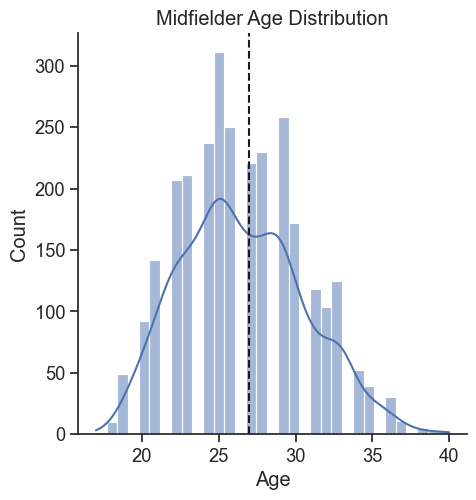

In [246]:
sns.displot(data=mid_df,
           x='Age',
           kde='kde')
ax = plt.gca()
ax.set_title('Midfielder Age Distribution')
ax.axvline(def_df['Age'].mean(), color='k',ls='--')
plt.show()

In [262]:
'''
Breaking the midfield positions into two groups so that it is easier to visualize
'''
subset_df1 = mid_df[mid_df['Club_Position'].isin(['LW', 'RW', 'RCM', 'CAM', 'LCM', 'LM'])] # first batch
subset_df2 = mid_df[mid_df['Club_Position'].isin(['LDM', 'RM','CDM', 'RDM','CM', 'RAM'])] # second batch

**NB: The charts below show the different midfield position and the distribution of each preffered foot per position**

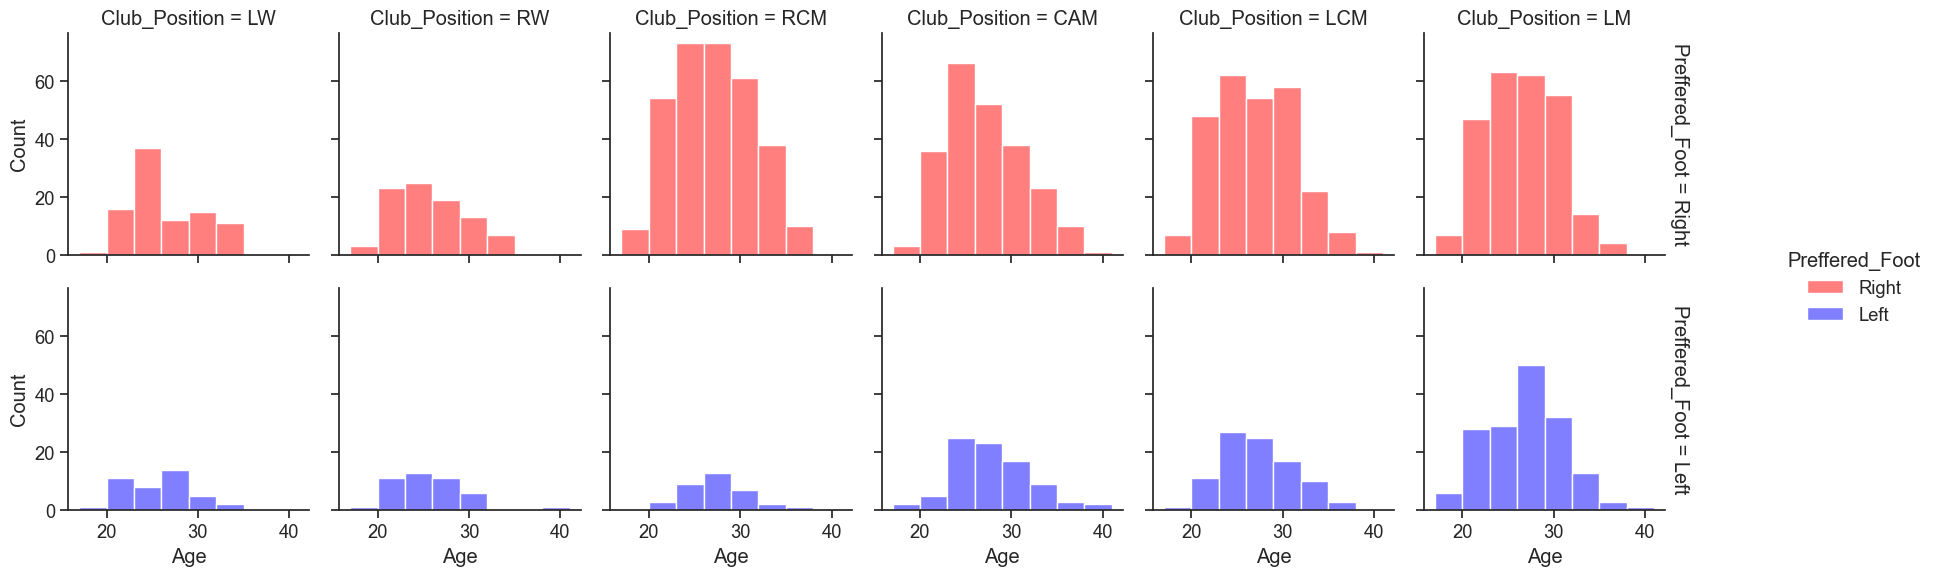

In [261]:
# Define your custom palette with red and blue
custom_palette = ["red", "blue"]

sns.set(style='ticks', font_scale=1.2)

# create a pairplot
sns.displot(subset_df1, x="Age", col="Club_Position", row="Preffered_Foot", hue='Preffered_Foot',
    binwidth=3, height=3, facet_kws=dict(margin_titles=True), palette=custom_palette
)

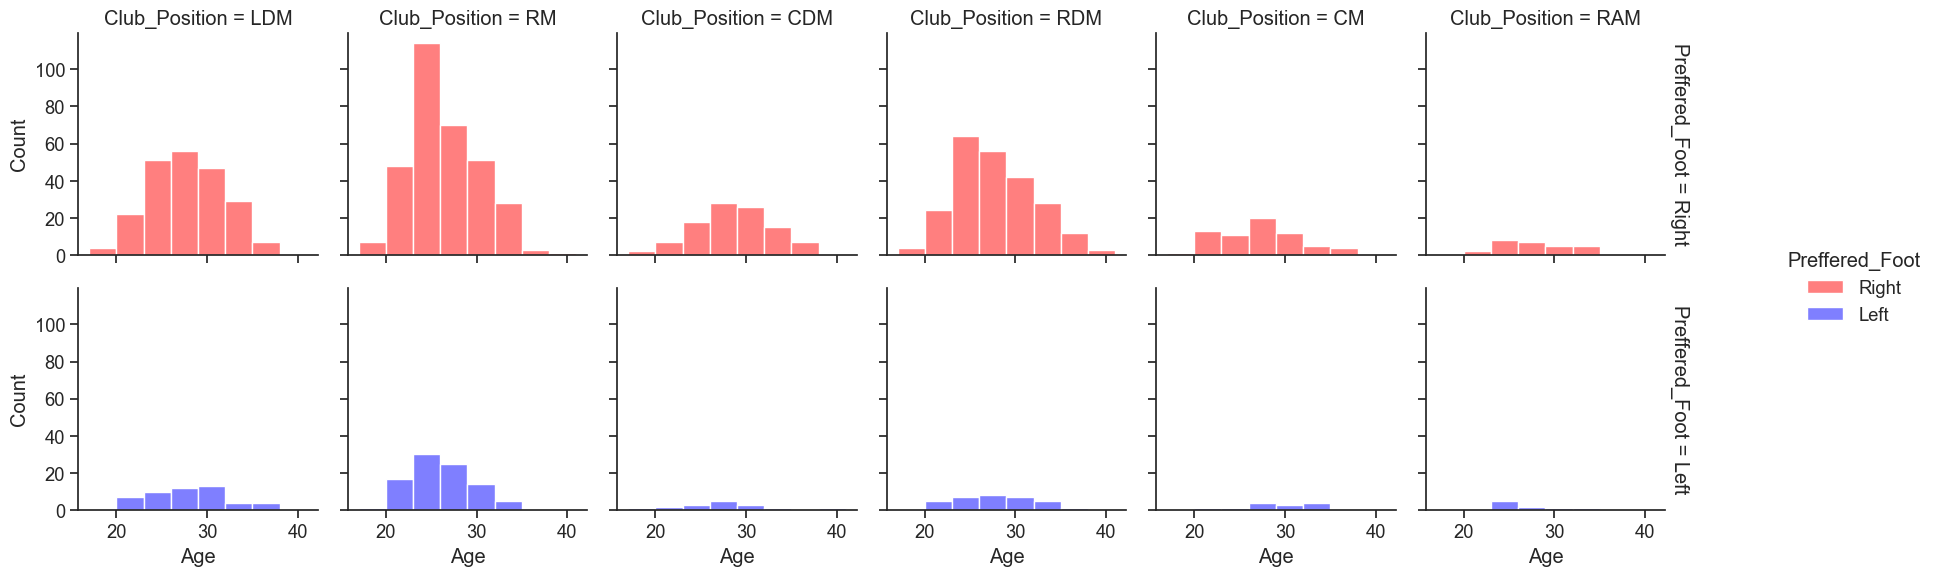

In [263]:
# Define your custom palette with red and blue
custom_palette = ["red", "blue"]

sns.set(style='ticks', font_scale=1.2)

# create a pairplot
sns.displot(subset_df2, x="Age", col="Club_Position", row="Preffered_Foot", hue='Preffered_Foot',
    binwidth=3, height=3, facet_kws=dict(margin_titles=True), palette=custom_palette
)

The distribution of the data depicts a popularity of right footed midfields than left footed in all of the positions.

Now a clear visualization of the ratio between right and left footed players.

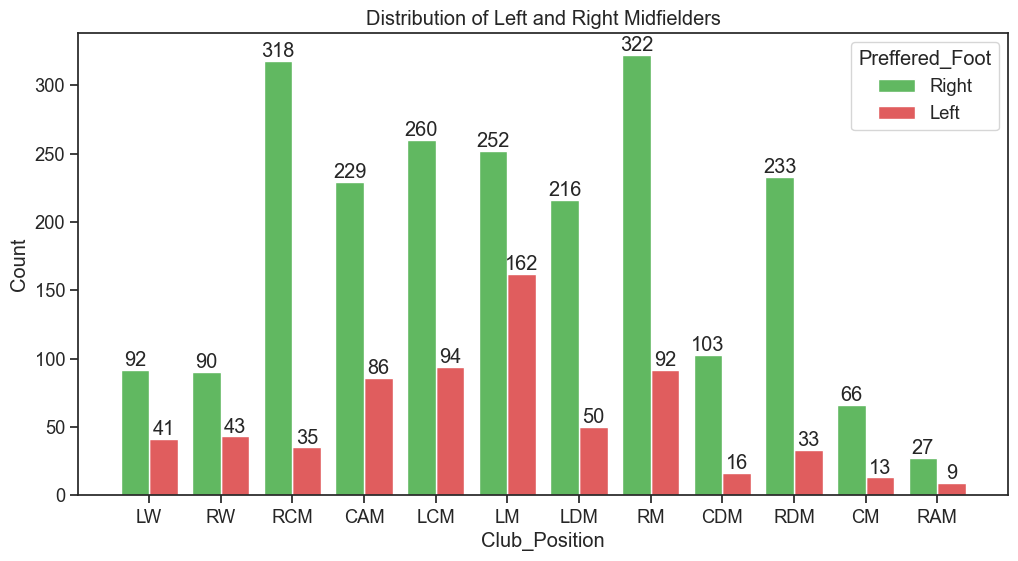

In [265]:
'''
Creating a similar graph as the one above but now directly comparing the left and right footed players.
'''
fig, ax1 = plt.subplots(figsize=(12,6))

# creating a pallete dict for the different colours
palette = {
    'Right': 'tab:green',
    'Left': 'tab:red',
}


ax = sns.histplot(data=mid_df, x="Club_Position",
             hue="Preffered_Foot", multiple="dodge", palette=palette, shrink=.8)

# label the x-values
for container in ax.containers: 
    ax.bar_label(container)


ax = plt.gca()
ax.set_title('Distribution of Left and Right Midfielders')
plt.show()

In [158]:
df.head()

Name Nationality          Club Club_Position  Club_Kit  \
0  Cristiano Ronaldo    Portugal   Real Madrid            LW       7.0   
1       Lionel Messi   Argentina  FC Barcelona            RW      10.0   
2             Neymar      Brazil  FC Barcelona            LW      11.0   
3        Luis Suárez     Uruguay  FC Barcelona            ST       9.0   
4       Manuel Neuer     Germany     FC Bayern            GK       1.0   

  Club_Joining  Contract_Expiry  Rating  Height  Weight  ... Penalties  \
0   07/01/2009           2021.0      94   185.0    80.0  ...        85   
1   07/01/2004           2018.0      93   170.0    72.0  ...        74   
2   07/01/2013           2021.0      92   174.0    68.0  ...        81   
3   07/11/2014           2021.0      92   182.0    85.0  ...        85   
4   07/01/2011           2021.0      92   193.0    92.0  ...        47   

  Volleys  GK_Positioning GK_Diving GK_Kicking  GK_Handling  GK_Reflexes  \
0      88              14         7         15           11           11   
1      85              14         6         15           11            8   
2      83              15         9         15            9           11   
3      88              33        27         31           25           37   
4      11              91        89         95           90           89   

   Height (m)    BMI    Positions  
0        1.85  23.37   Midfielder  
1        1.70  24.91   Midfielder  
2        1.74  22.46   Midfielder  
3        1.82  25.66      Reserve  
4        1.93  24.70  Goal Keeper  

[5 rows x 54 columns]

**There is a correlation between the height and weight of the players. We also cannot identify the relationship between the  players position with both the height and weight.**

### Pairplot  
Creating a pairplot compare how age affects accelaration, speed, composure, stamina, agility and shot power.

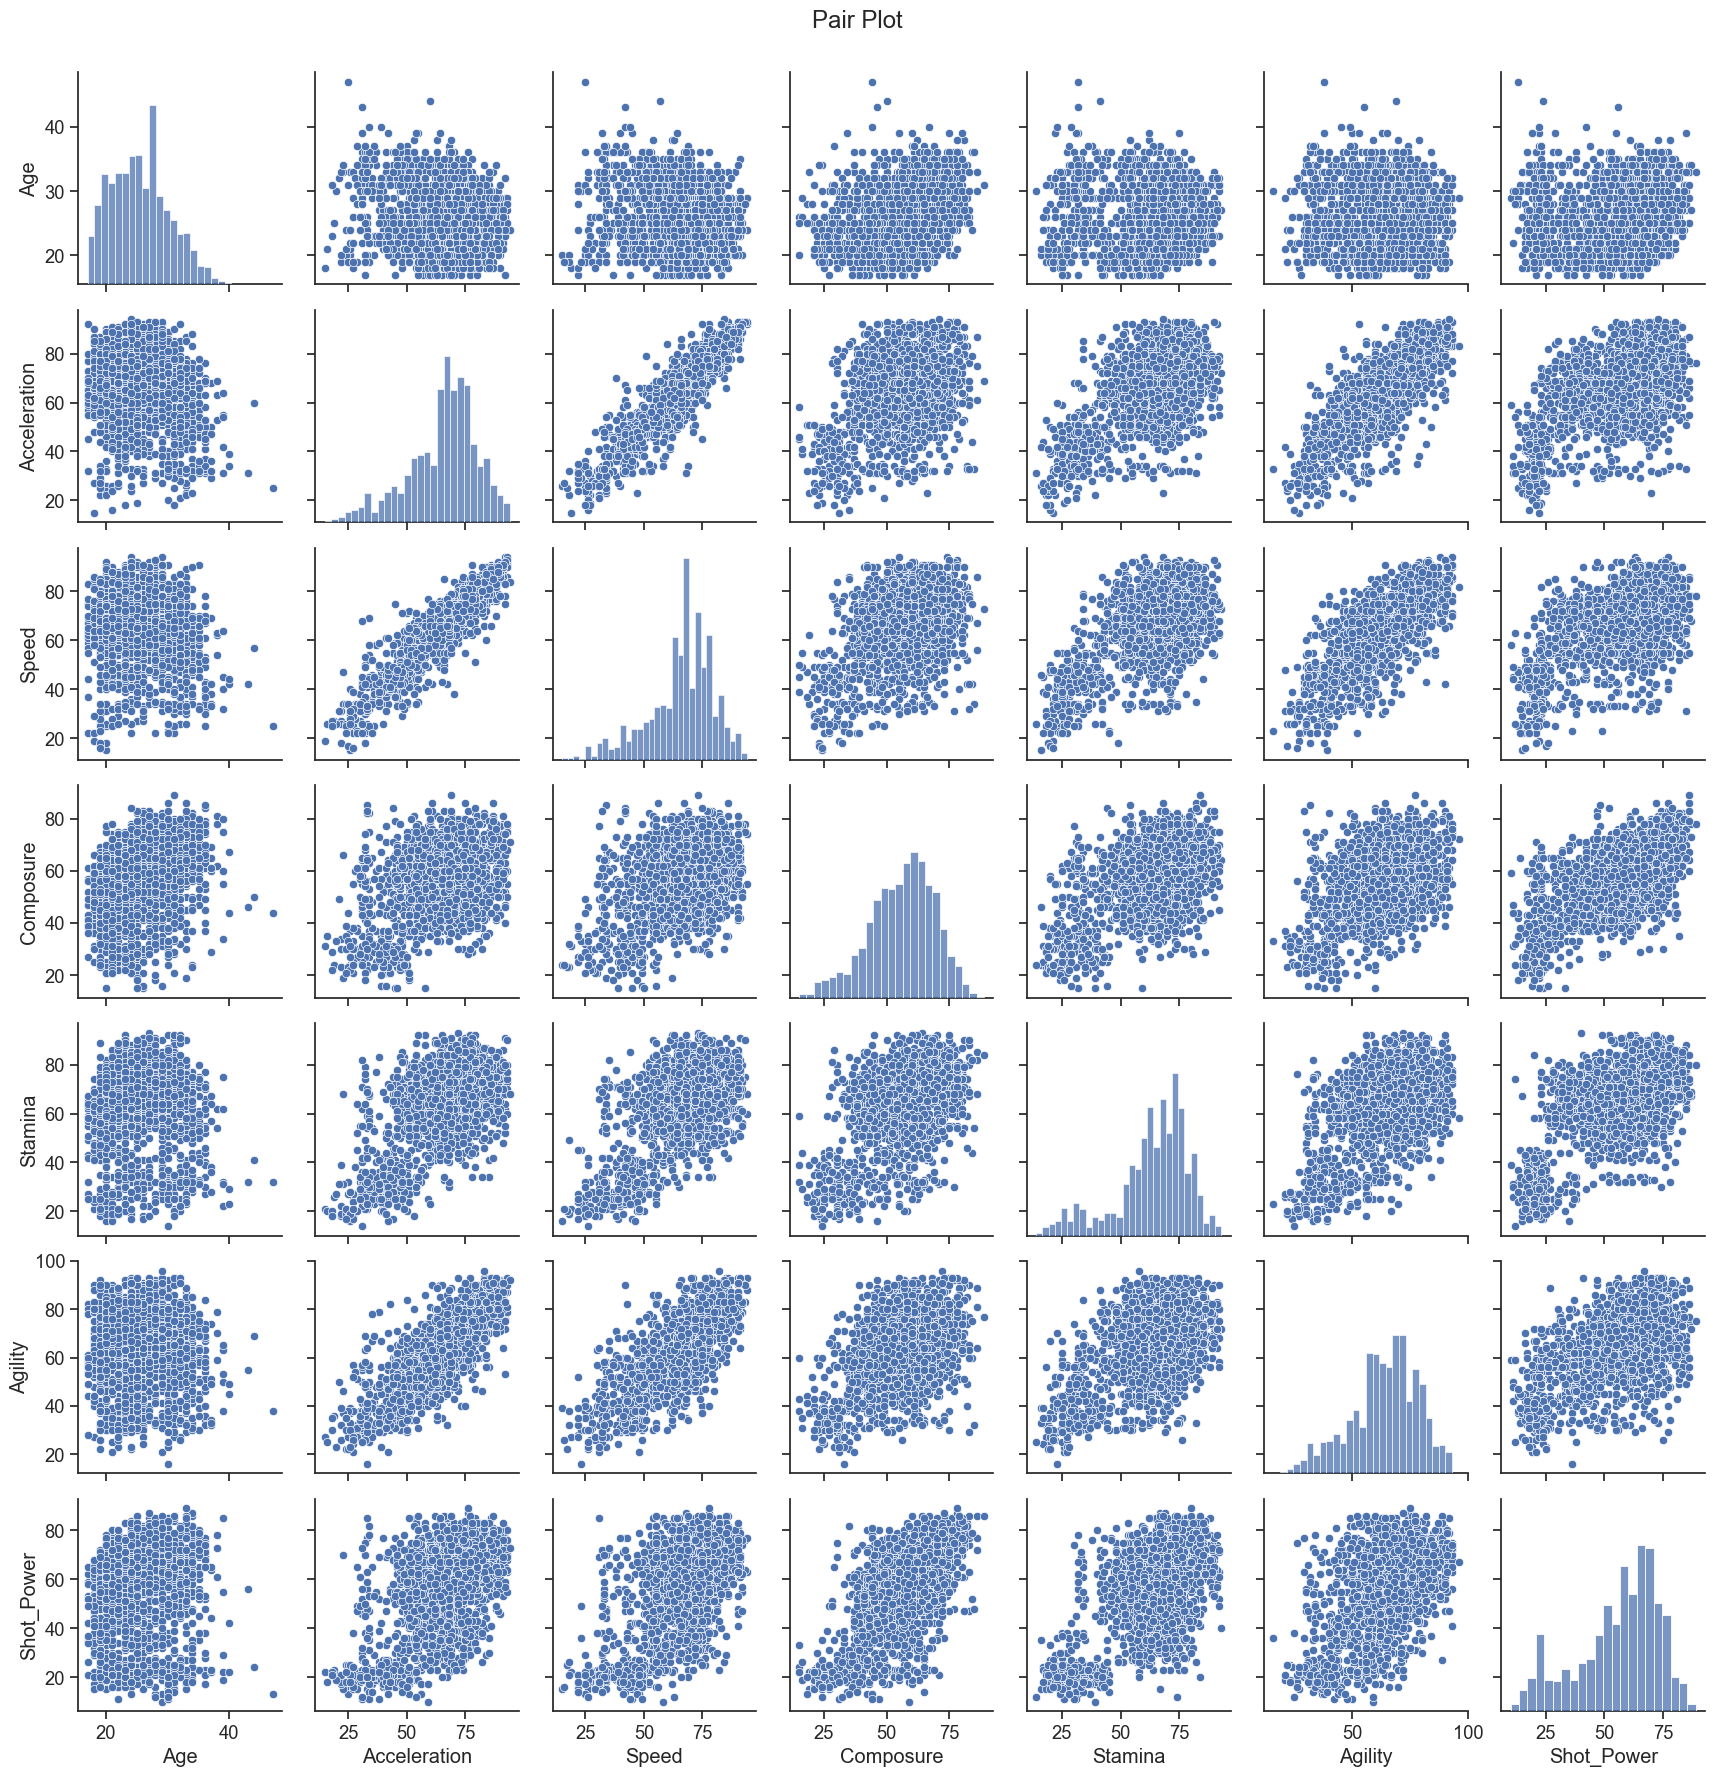

In [159]:
sns.set(style='ticks', font_scale=1.2)

# create a pairplot 
sns.pairplot(df.sample(2000), vars=['Age', 'Acceleration', 'Speed', 'Composure', 'Stamina', 'Agility', 'Shot_Power'])
plt.suptitle('Pair Plot', y=1.02)
plt.show()

This pairplot is showing us something different to what we thought we would see. The most pronounced relationship is between acceleration and all the other features namely agility, stamina, speed and shot power. There's a positive correlation between accelaration and these other mentioned features. We will now visualise the numerical value of the  correlation. 

**Numerical Correlation Viz**

<Axes: >

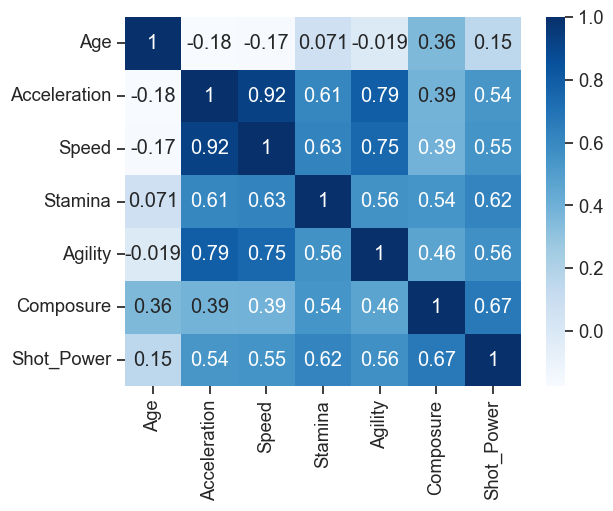

In [160]:
# Calculating the correlation
corr = df[['Age', 'Acceleration', 'Speed', 'Stamina', 'Agility', 'Composure', 'Shot_Power']].corr()
sns.heatmap(corr, cmap='Blues', annot=True)

The correlation plot support the above visual, there is a positive correlation between Accelaration and the other fetures.

### Age Distribution

<Axes: xlabel='Age', ylabel='Density'>

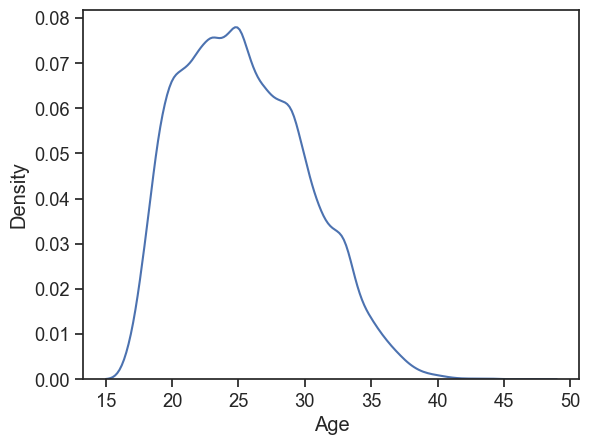

In [161]:
sns.kdeplot(data=df, x='Age')

We need to plot a boxplot to get the min, median and max ages of the players we have. We can see that many of our players are relatively young.

<Axes: xlabel='Age'>

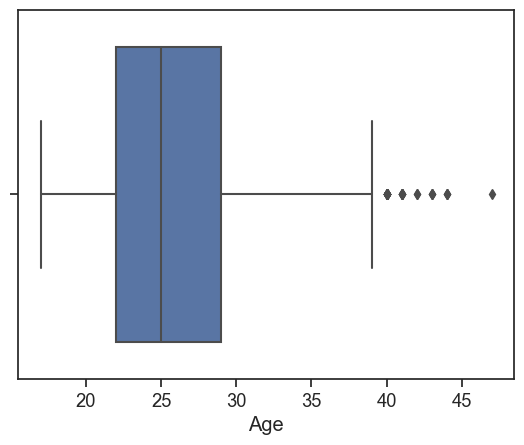

In [162]:
sns.boxplot(x=df['Age'])

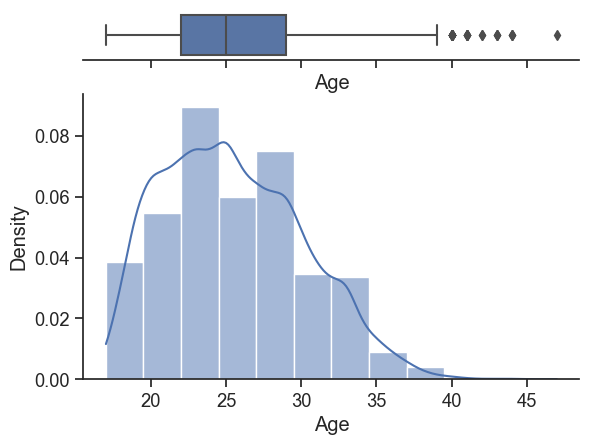

In [163]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=df['Age'], ax=ax_box)
sns.histplot(x=df['Age'], bins=12, kde=True, stat='density', ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

## 5. Feature Engineering <a name="feature-engineering"></a>
Describe how you engineered or selected the features used for modeling. Explain the rationale behind your choices and any domain-specific knowledge applied.

[Back to Top](#table-of-contents)

---


## 6. Modeling <a name="modeling"></a>
Discuss the machine learning or statistical models you utilized in your project. Include information on model selection, hyperparameter tuning, and model training.

[Back to Top](#table-of-contents)

---



## 7. Evaluation <a name="evaluation"></a>
Present the evaluation metrics used to assess the performance of your models. Discuss the results and any adjustments made based on the evaluation.

[Back to Top](#table-of-contents)

---


## 8. Conclusion <a name="Conclusion"></a>
Summarize your findings, the implications of your work, and potential areas for future improvement or research.

[Back to Top](#table-of-contents)